In [46]:
!pip install xlrd



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the dataset

df = pd.read_excel('/content/aspiring_minds_employability_outcomes_2015.xlsx')

# Displaying the head of the dataset
print(df.head())

# Displaying the shape of the dataset
print(df.shape)

# Displaying the description of the dataset
print(df.describe())

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

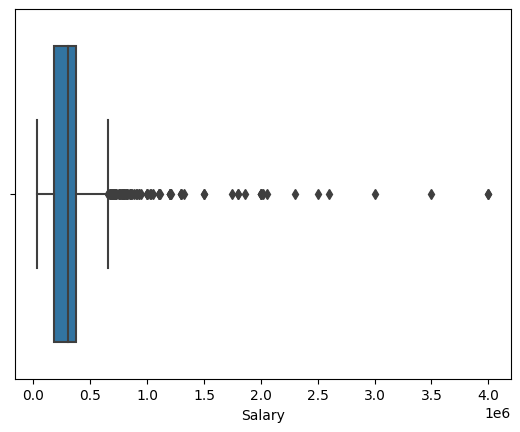

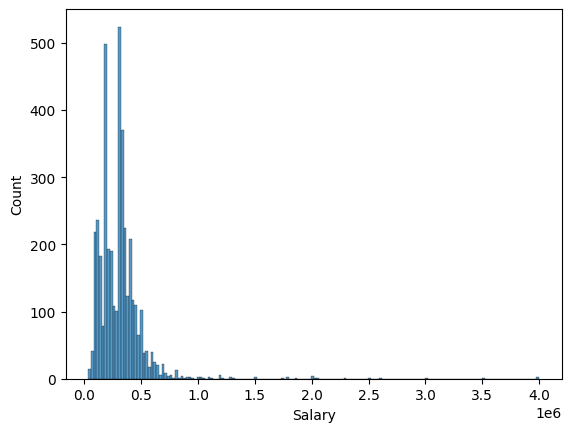

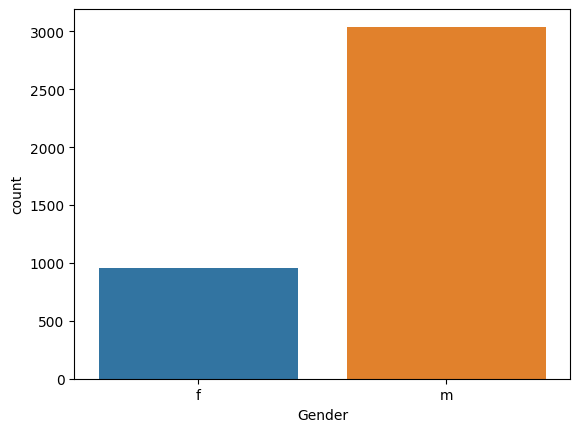

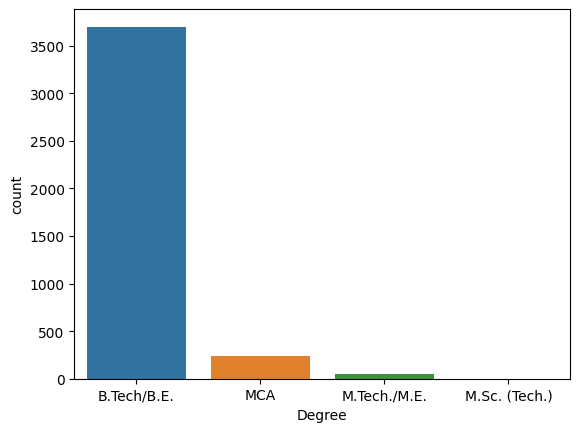

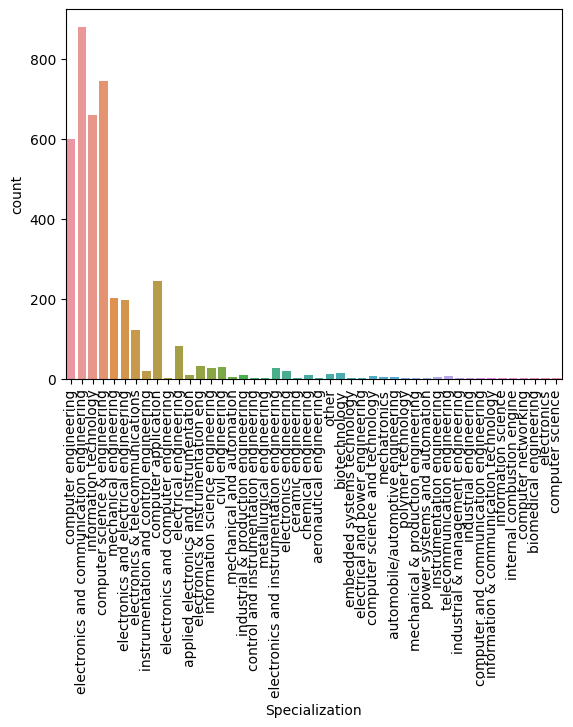

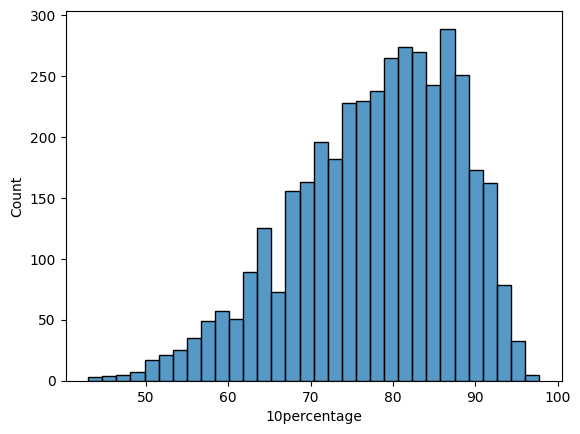

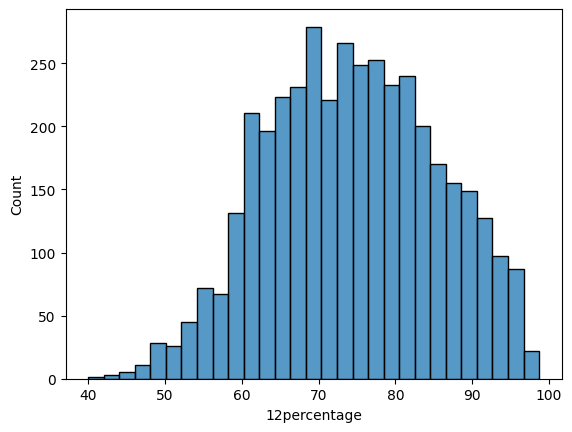

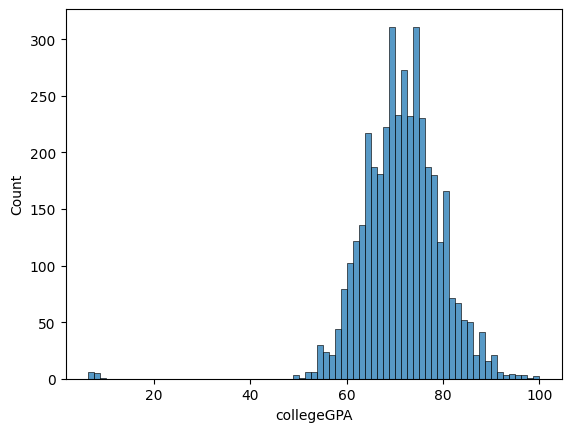

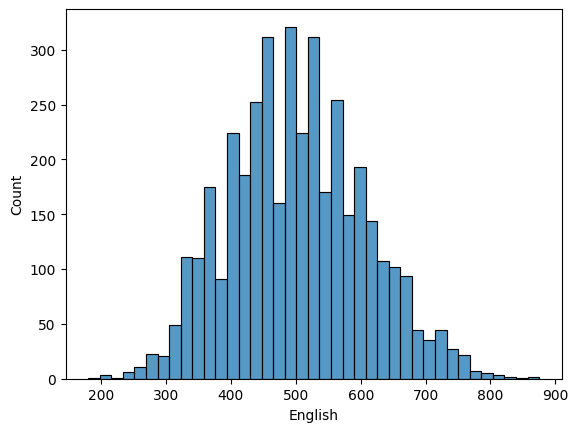

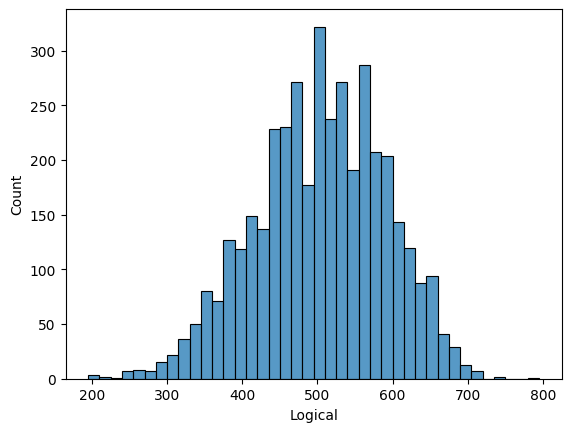

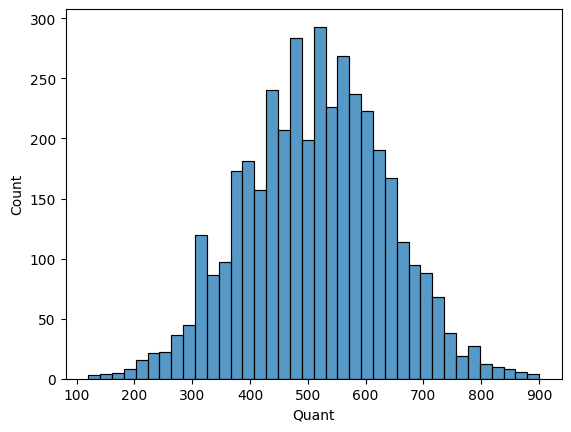

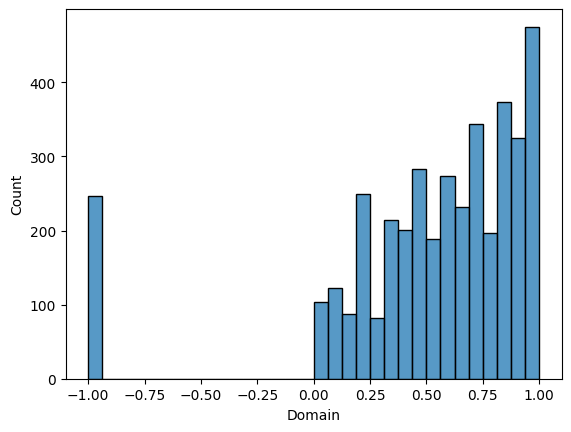

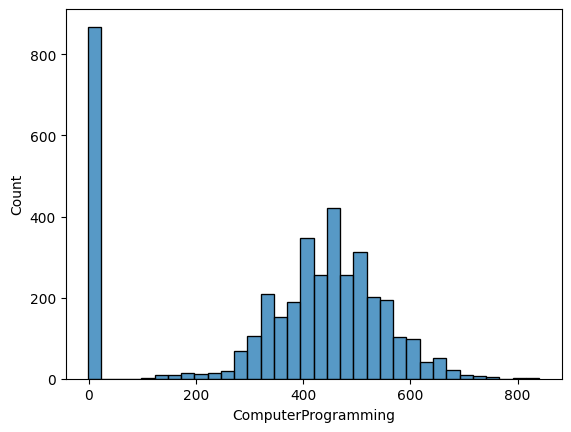

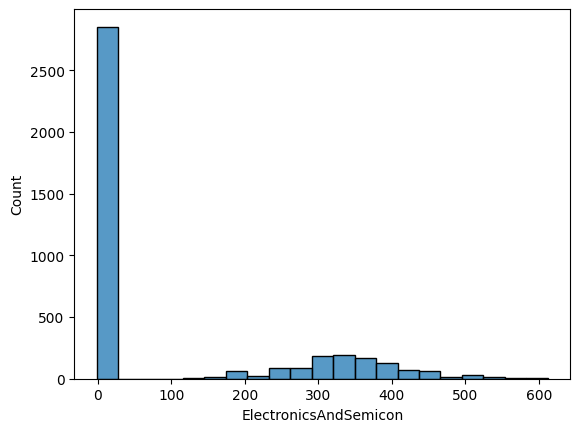

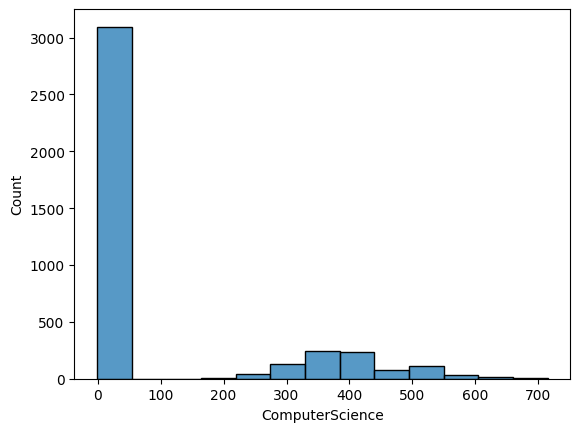

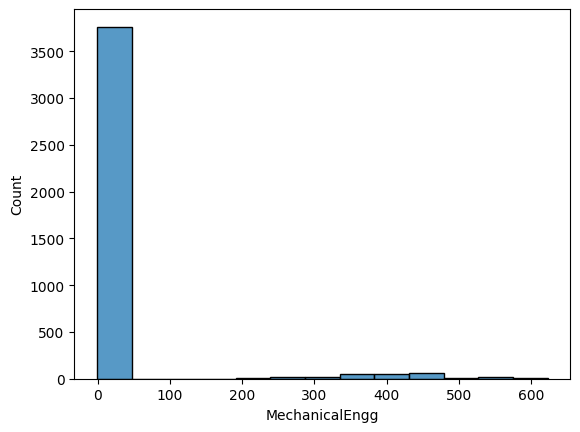

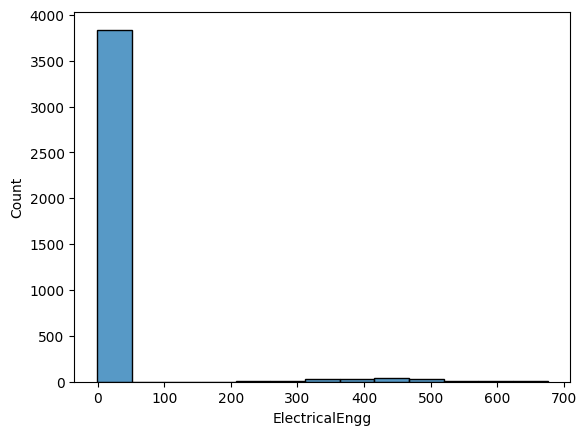

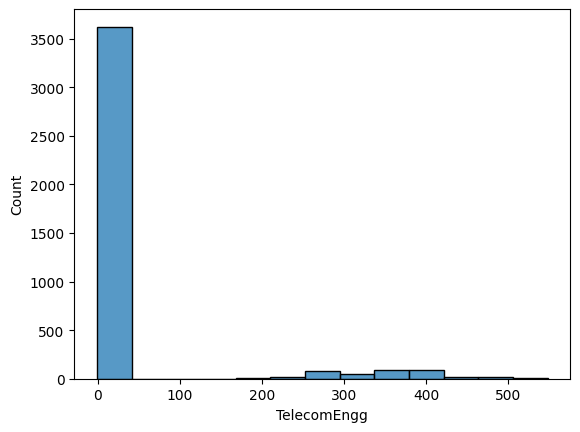

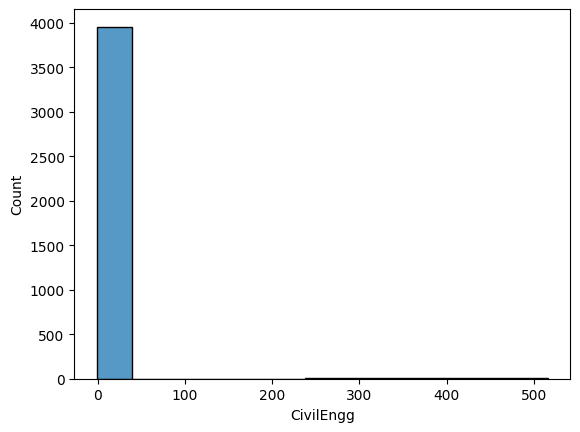

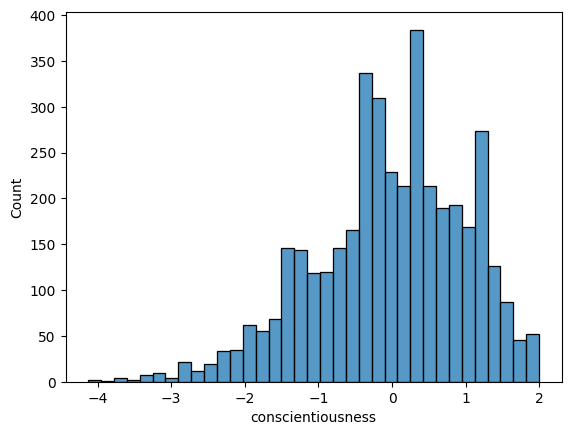

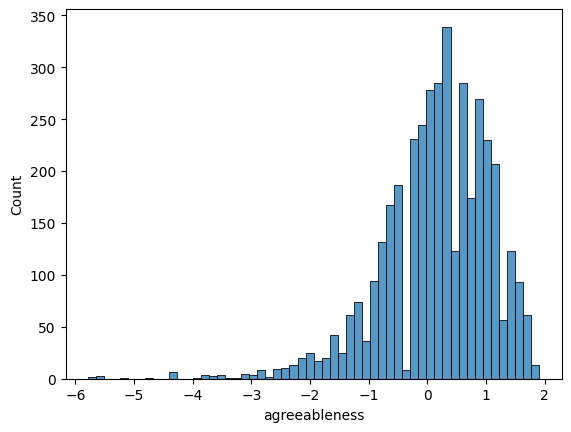

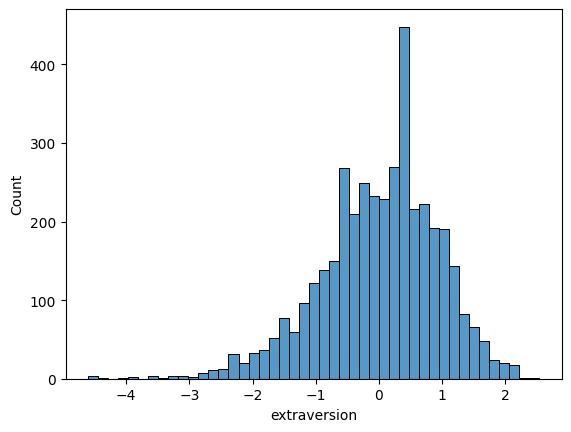

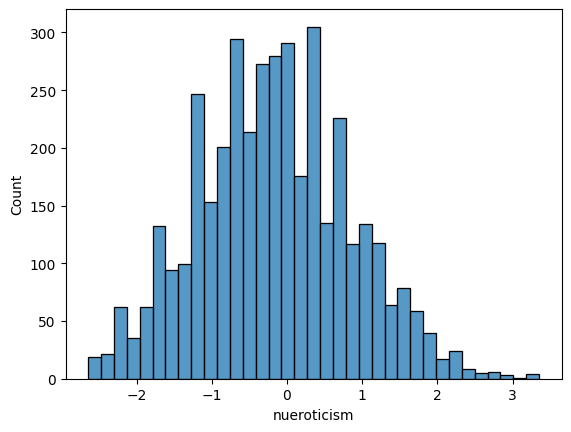

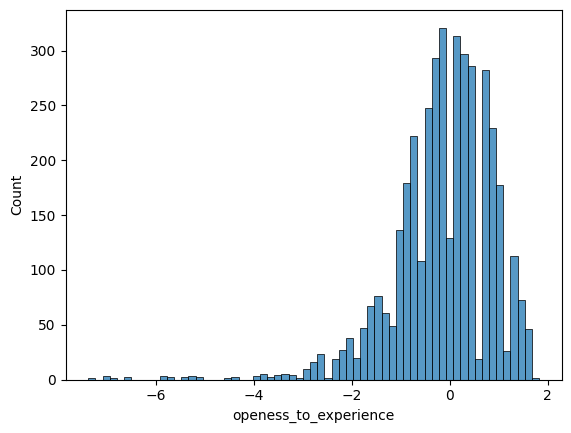

In [48]:

# create a boxplot for the Salary column to identify outliers
sns.boxplot(x=df['Salary'])
plt.show()

# create a histogram for the Salary column to understand its distribution
sns.histplot(x=df['Salary'])
plt.show()

# create countplots for the categorical variables to understand their frequency distribution
sns.countplot(x=df['Gender'])
plt.show()

sns.countplot(x=df['Degree'])
plt.show()

sns.countplot(x=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

# create histograms for the numerical columns to understand their probability distribution
sns.histplot(x=df['10percentage'])
plt.show()

sns.histplot(x=df['12percentage'])
plt.show()

sns.histplot(x=df['collegeGPA'])
plt.show()

sns.histplot(x=df['English'])
plt.show()

sns.histplot(x=df['Logical'])
plt.show()

sns.histplot(x=df['Quant'])
plt.show()

sns.histplot(x=df['Domain'])
plt.show()

sns.histplot(x=df['ComputerProgramming'])
plt.show()

sns.histplot(x=df['ElectronicsAndSemicon'])
plt.show()

sns.histplot(x=df['ComputerScience'])
plt.show()

sns.histplot(x=df['MechanicalEngg'])
plt.show()

sns.histplot(x=df['ElectricalEngg'])
plt.show()

sns.histplot(x=df['TelecomEngg'])
plt.show()

sns.histplot(x=df['CivilEngg'])
plt.show()

sns.histplot(x=df['conscientiousness'])
plt.show()

sns.histplot(x=df['agreeableness'])
plt.show()

sns.histplot(x=df['extraversion'])
plt.show()

sns.histplot(x=df['nueroticism'])
plt.show()

sns.histplot(x=df['openess_to_experience'])
plt.show()


<Axes: ylabel='Frequency'>

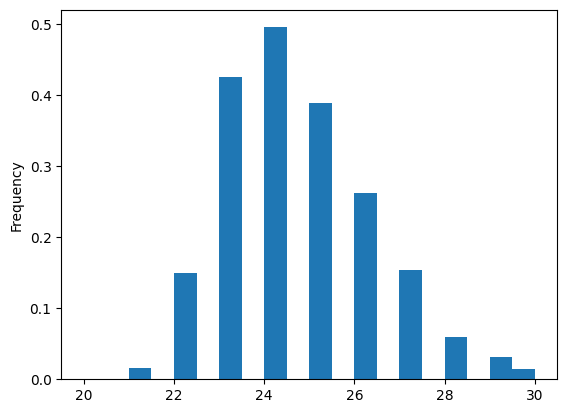

In [49]:
data=df

# Drop columns with too many missing values
data.dropna(thresh=600, axis=1, inplace=True)

# Convert the Date of Birth column to a datetime dtype
data["DOB"] = pd.to_datetime(data["DOB"])

# Calculate the age of each candidate as of January 1, 2016
jan_1_2016 = pd.to_datetime("2016-01-01")
data["age"] = (jan_1_2016 - data["DOB"]).astype('timedelta64[Y]')

# Drop the original DOB column
data.drop("DOB", axis=1, inplace=True)

# Remove outliers in the age column using the interquartile range (IQR) method
q1, q3 = np.percentile(data["age"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data["age"] >= lower_bound) & (data["age"] <= upper_bound)]

# Plot the distribution of the age column
data["age"].plot(kind="hist", bins=20, density=True)


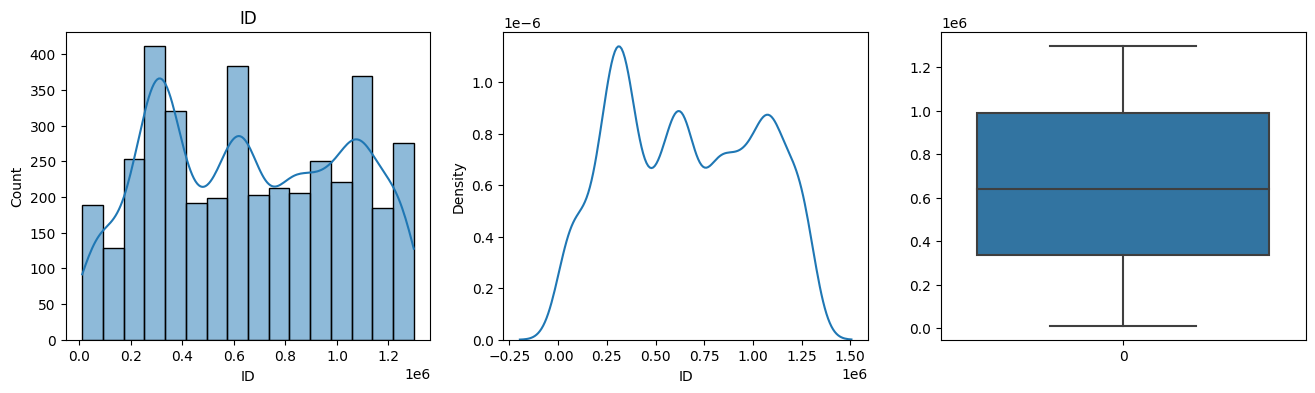

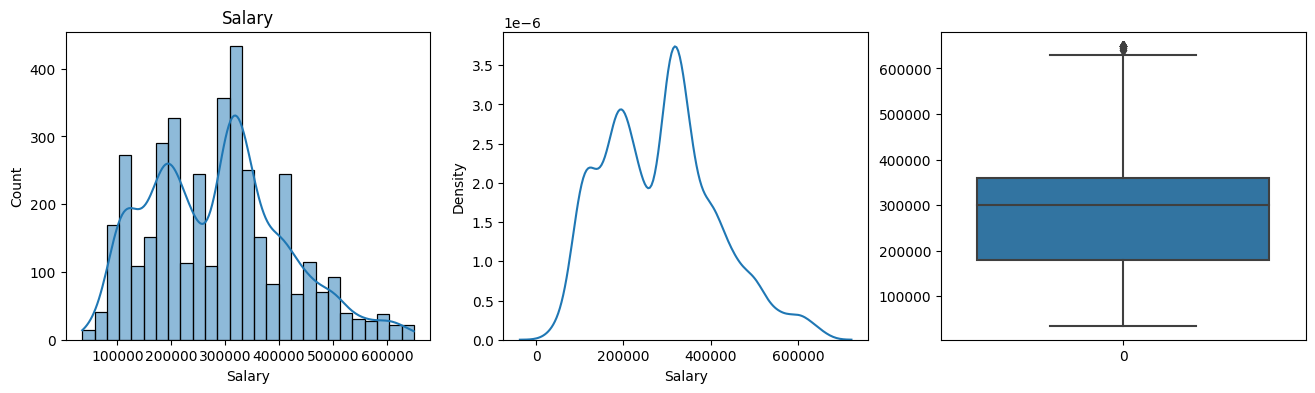

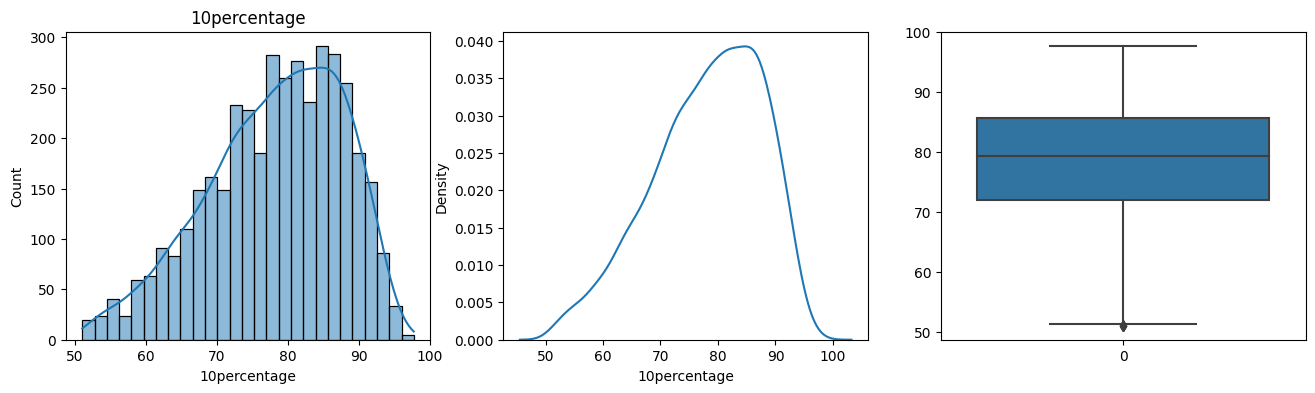

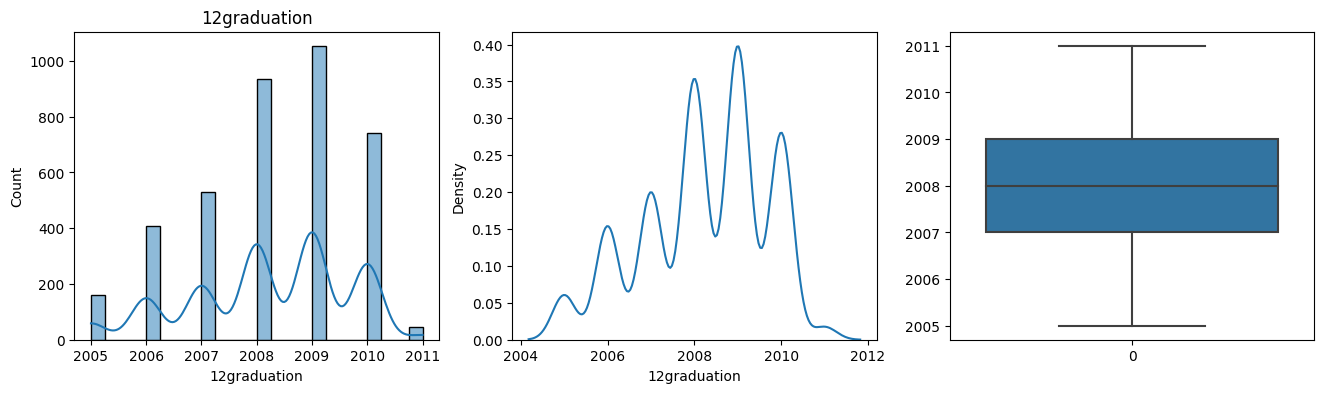

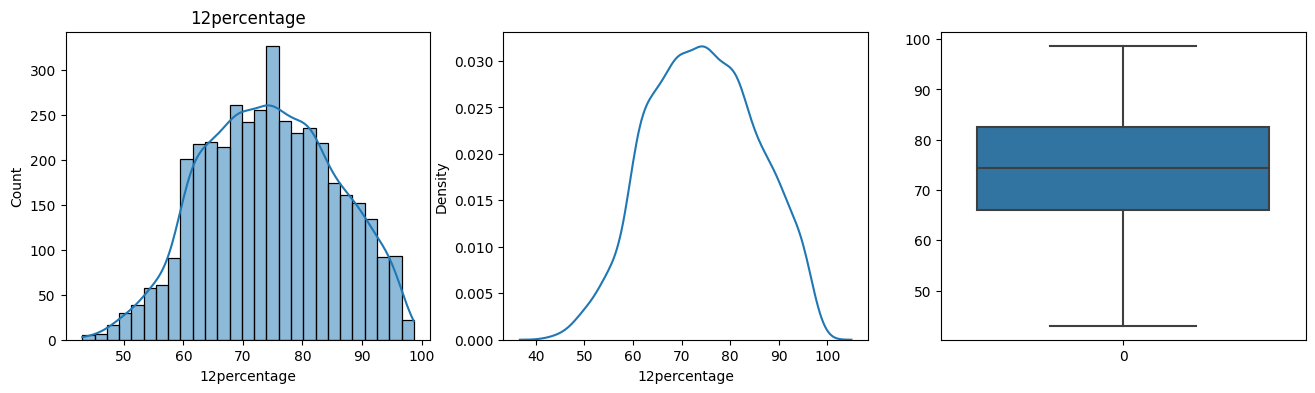

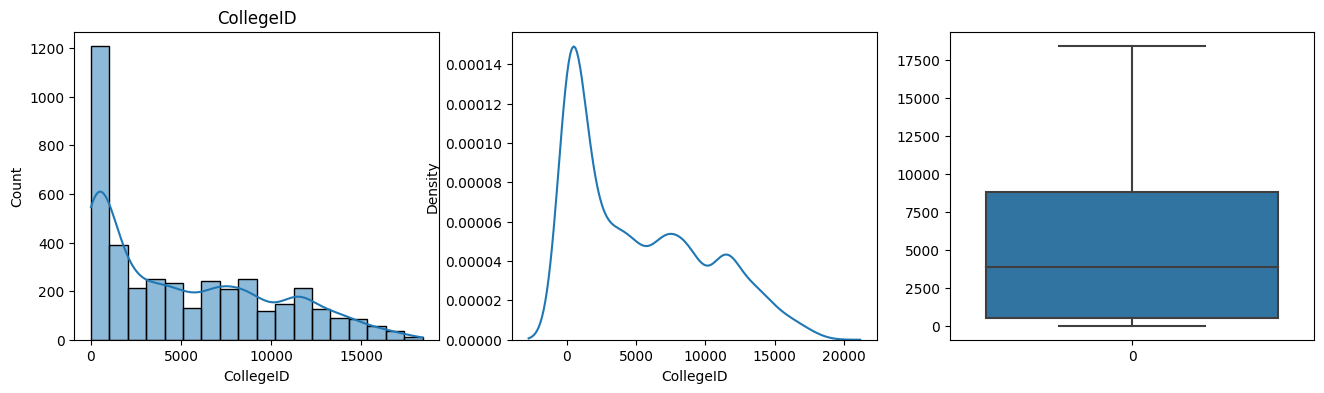

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


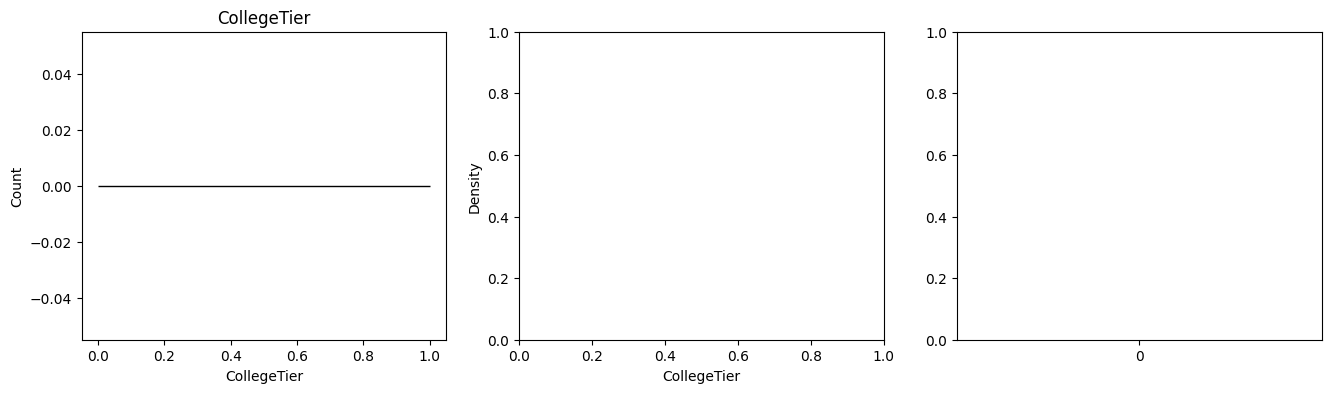

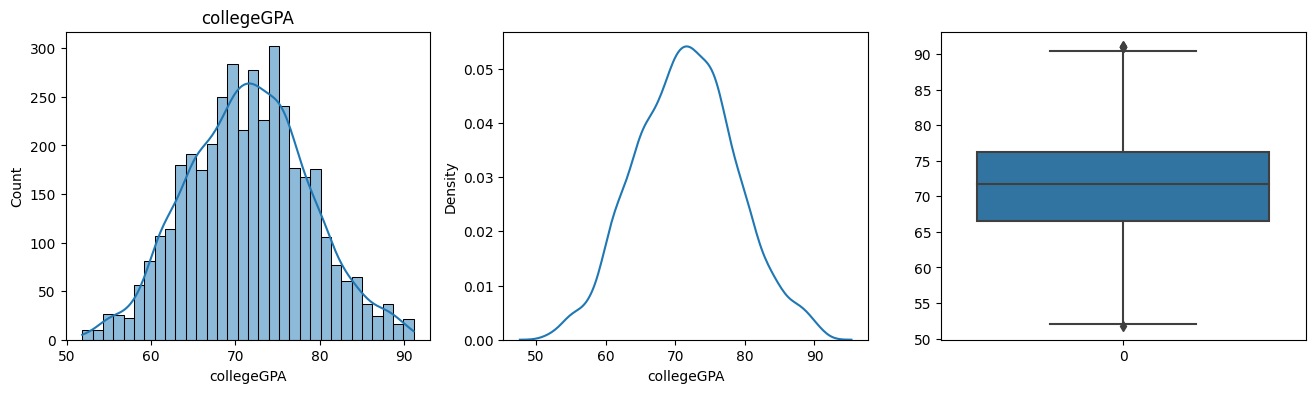

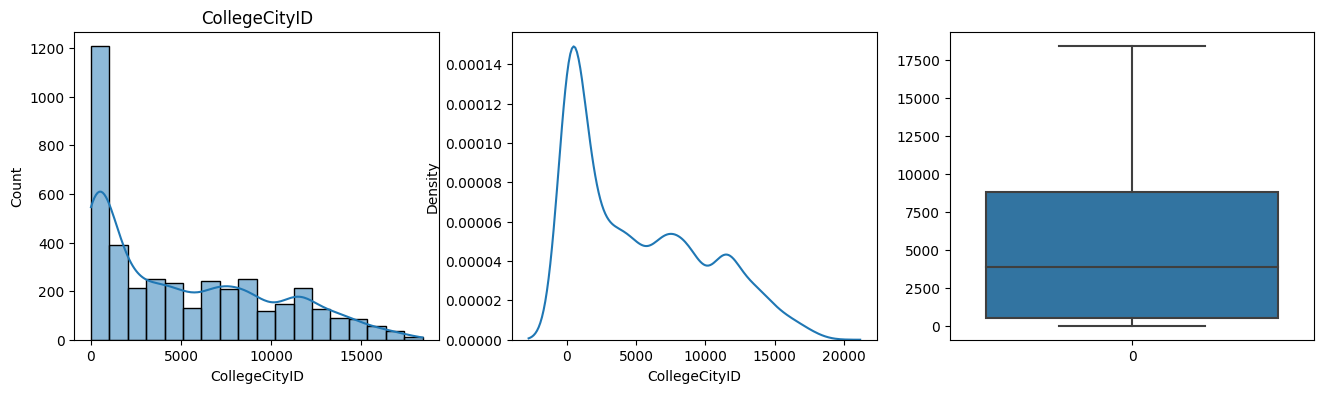

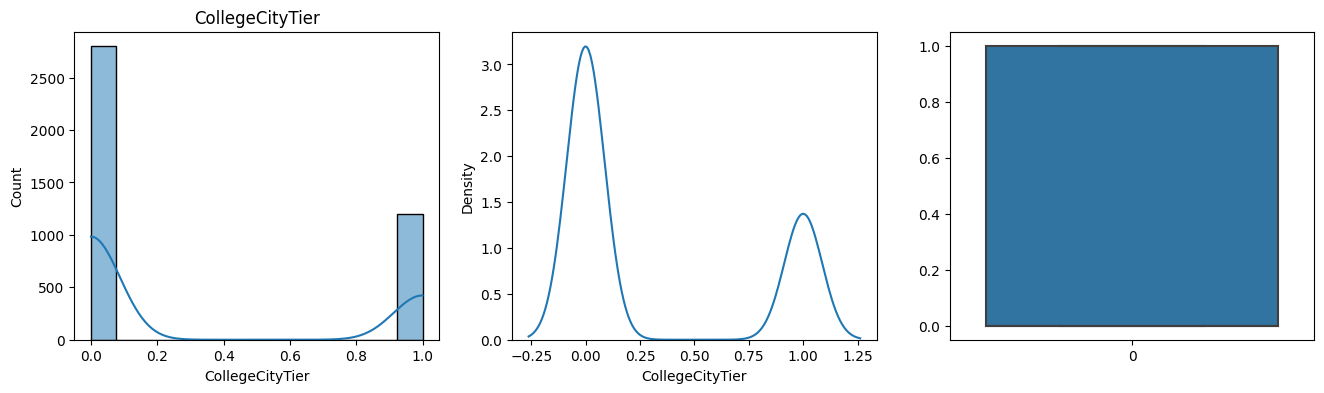

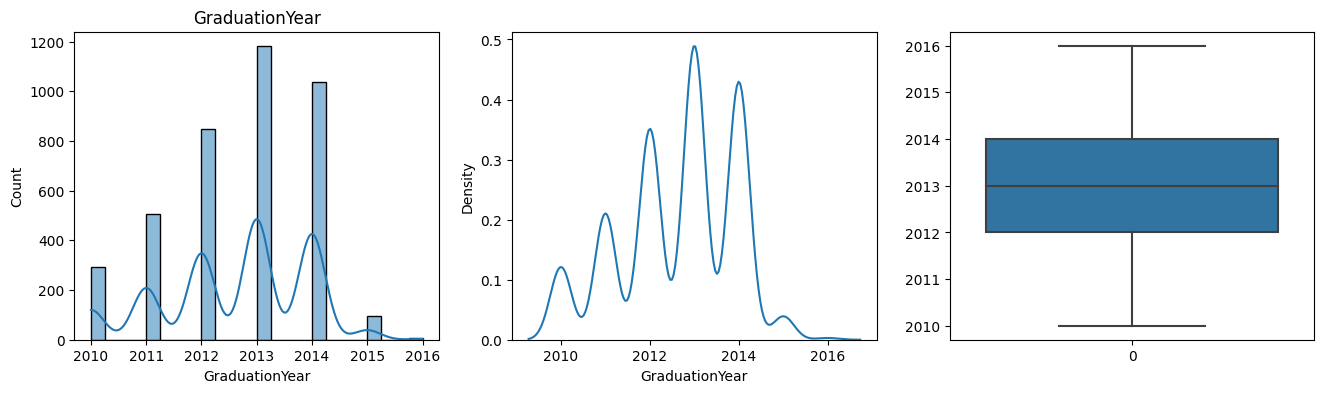

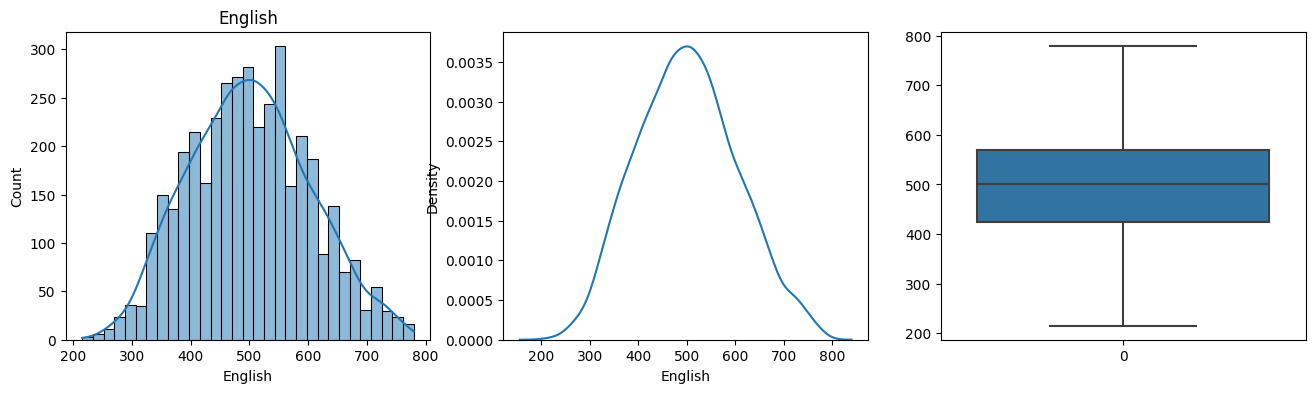

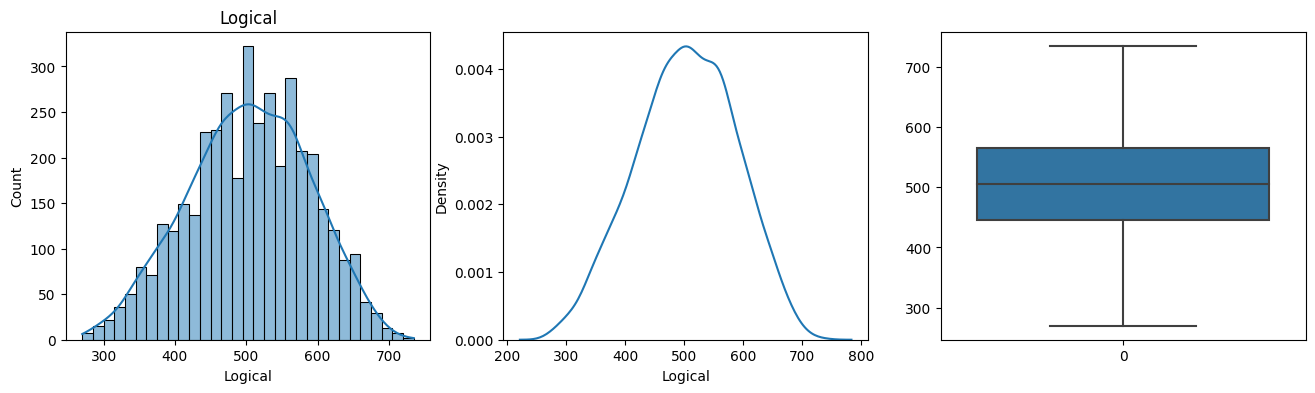

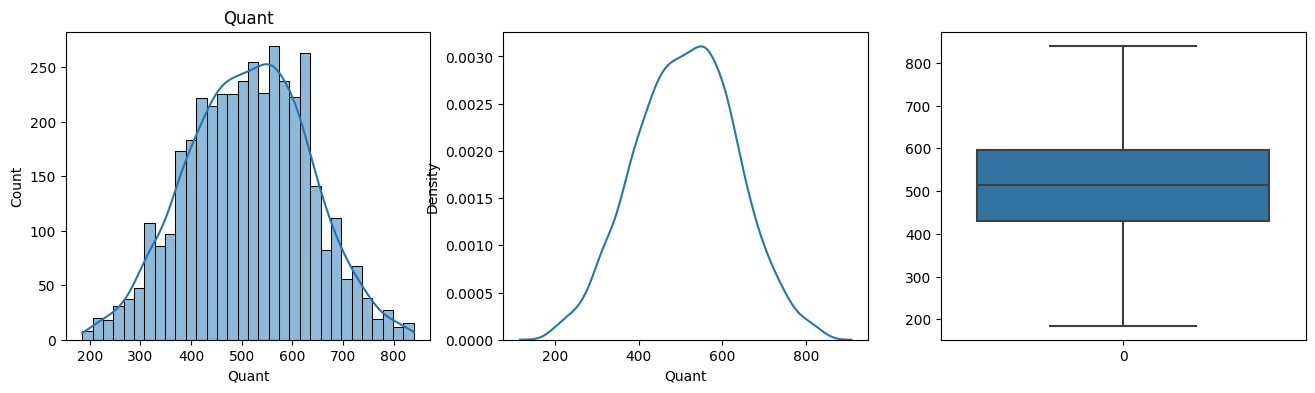

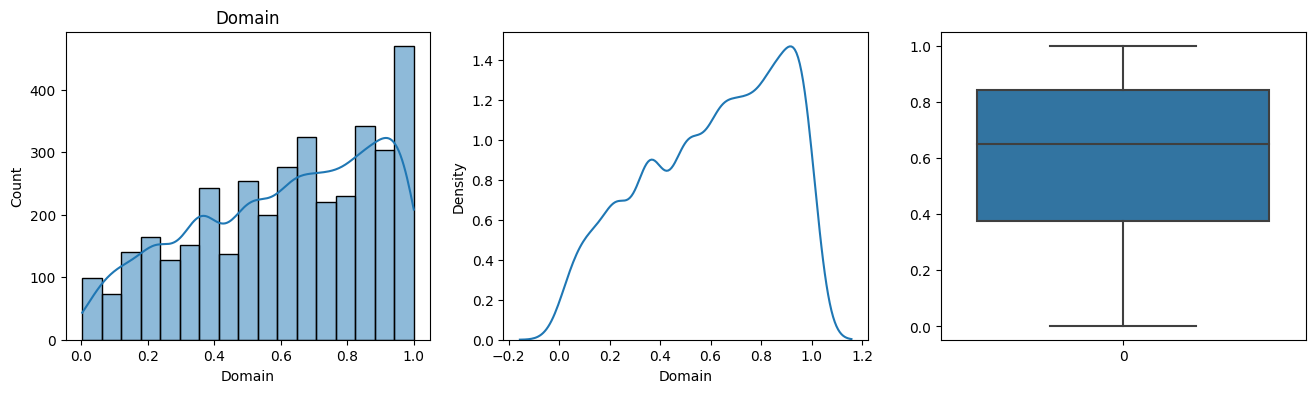

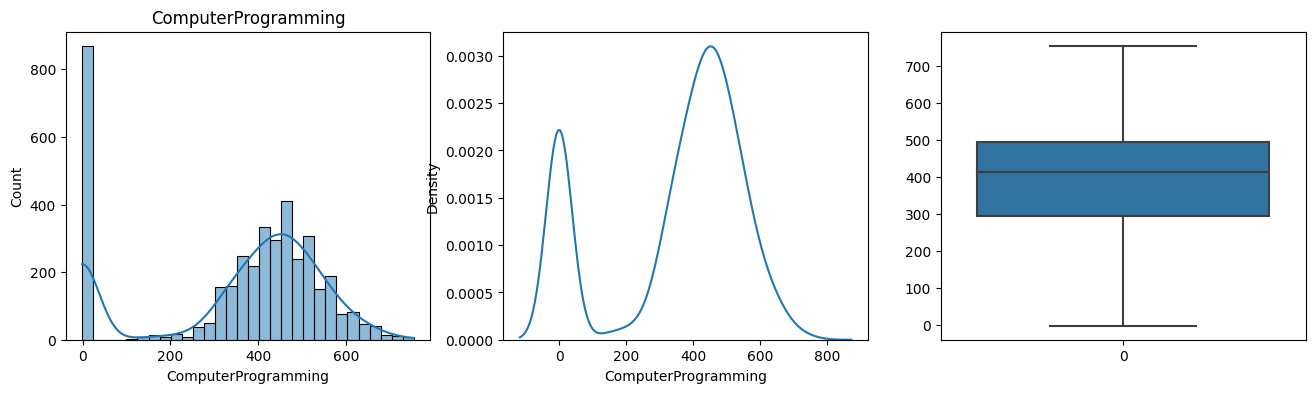

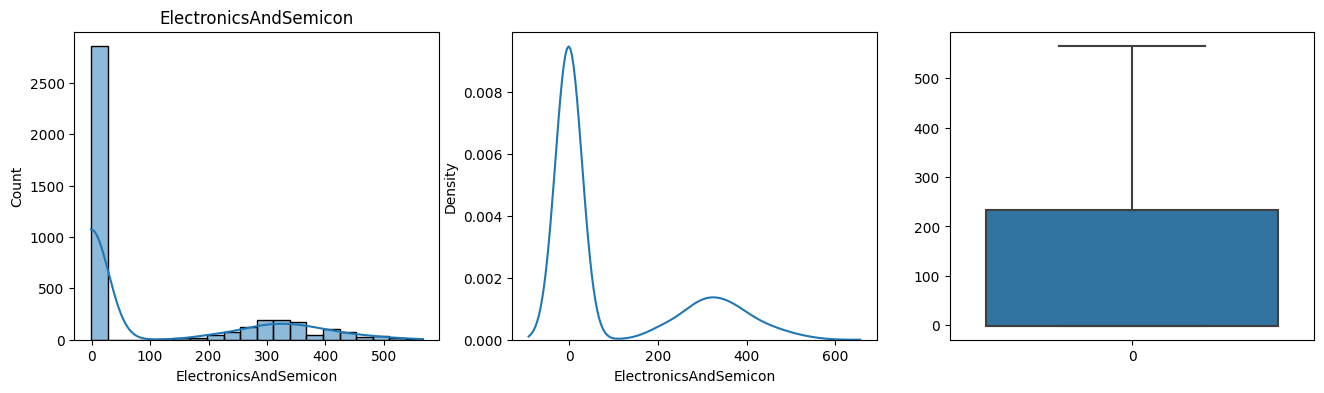

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


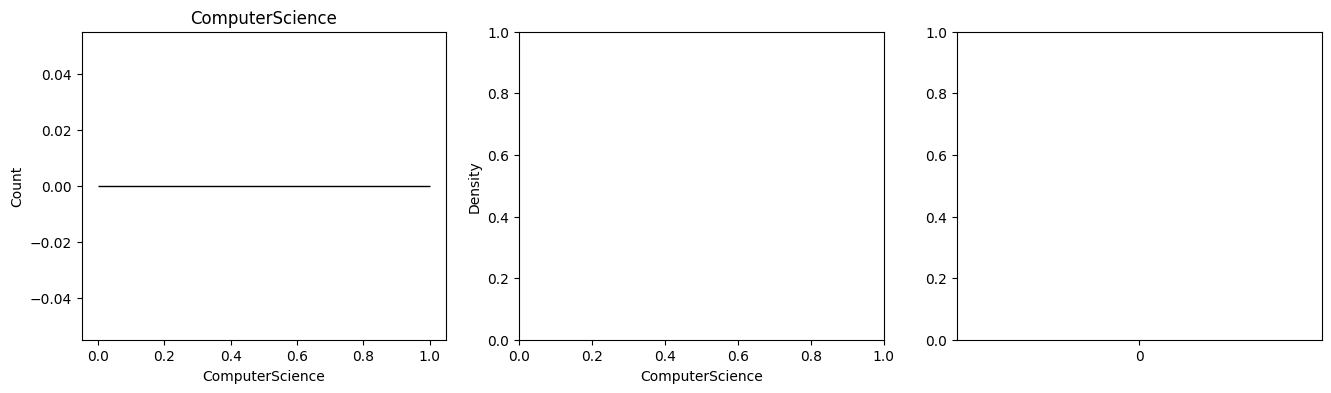

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


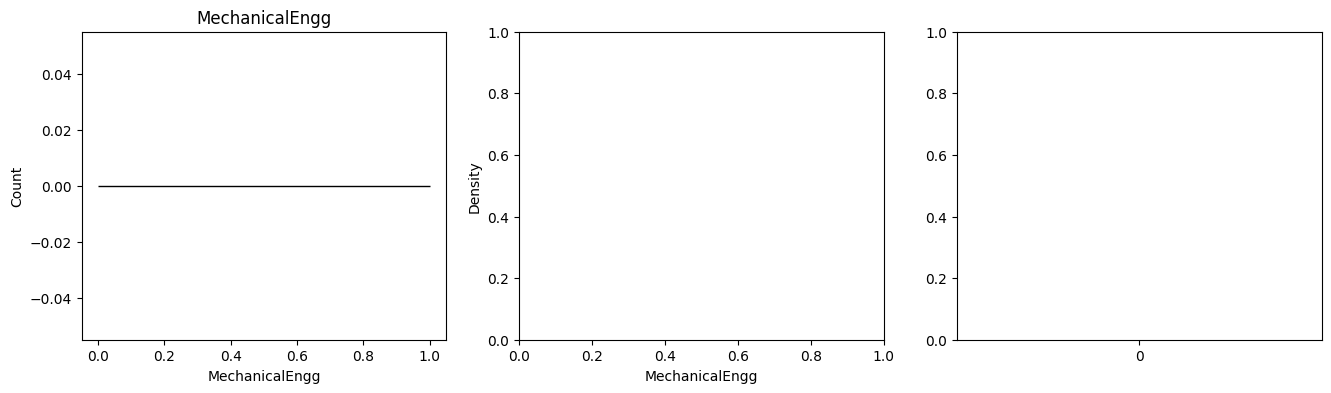

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


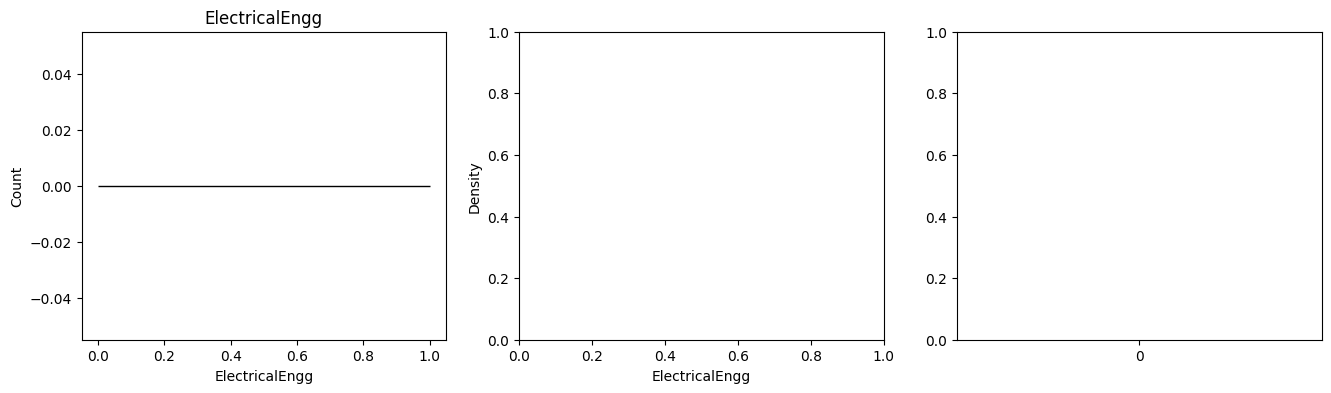

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


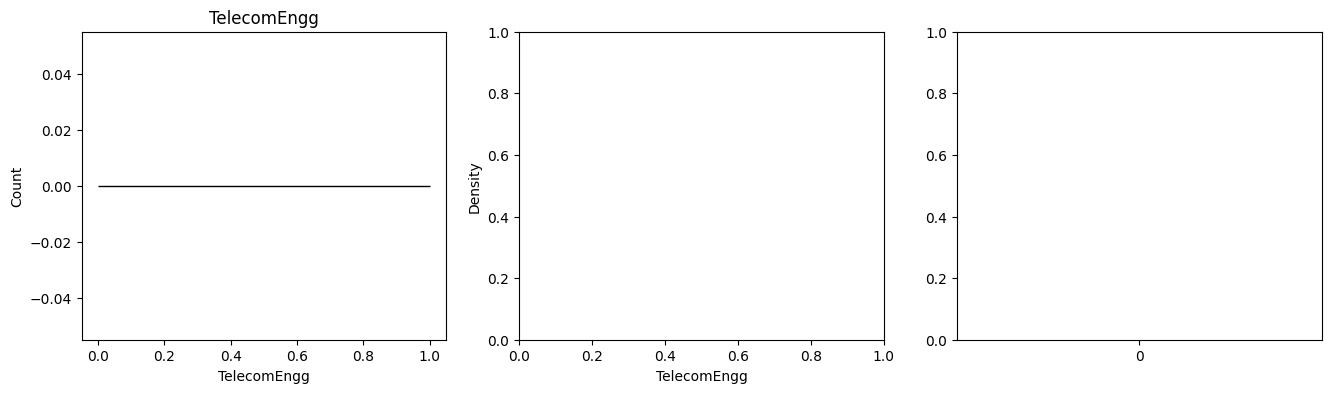

<ipython-input-50-48dbdf0dc722>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


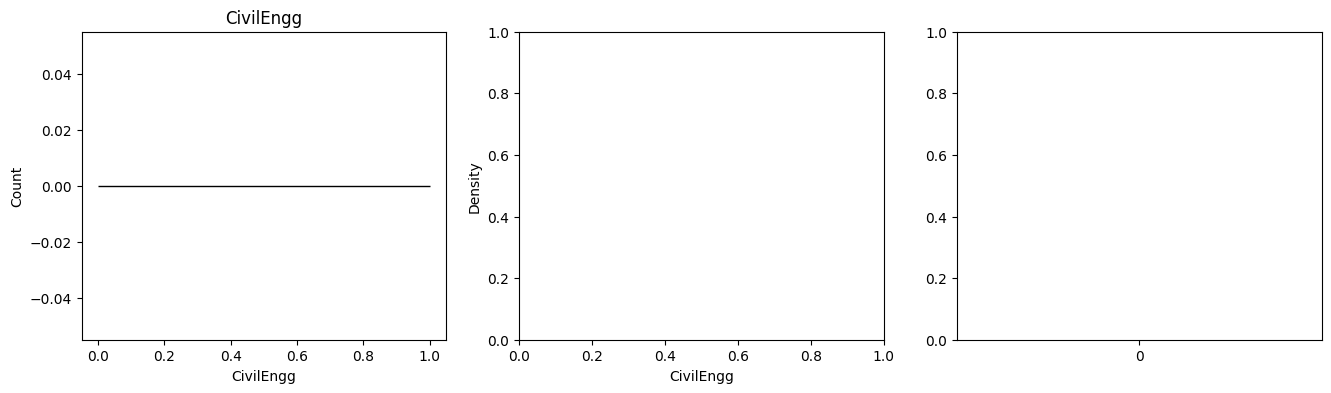

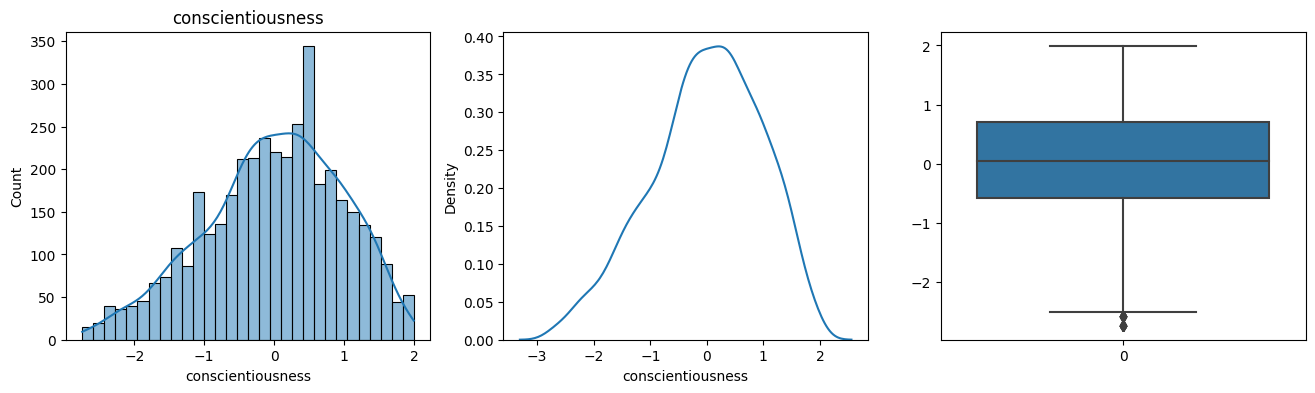

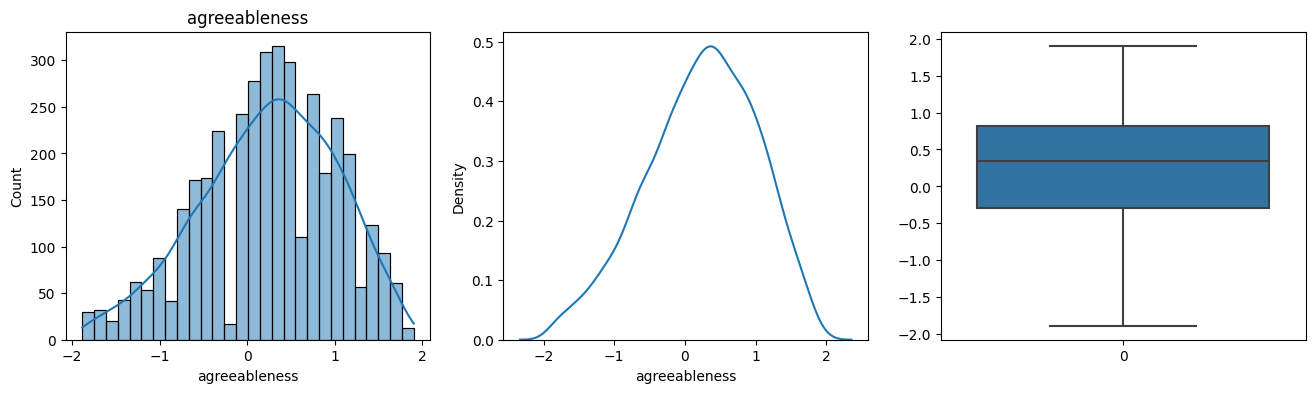

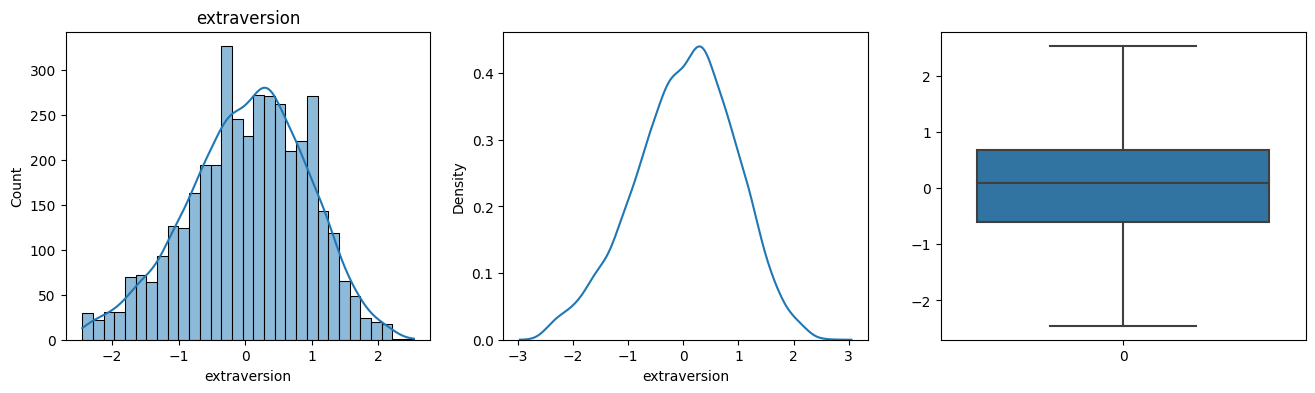

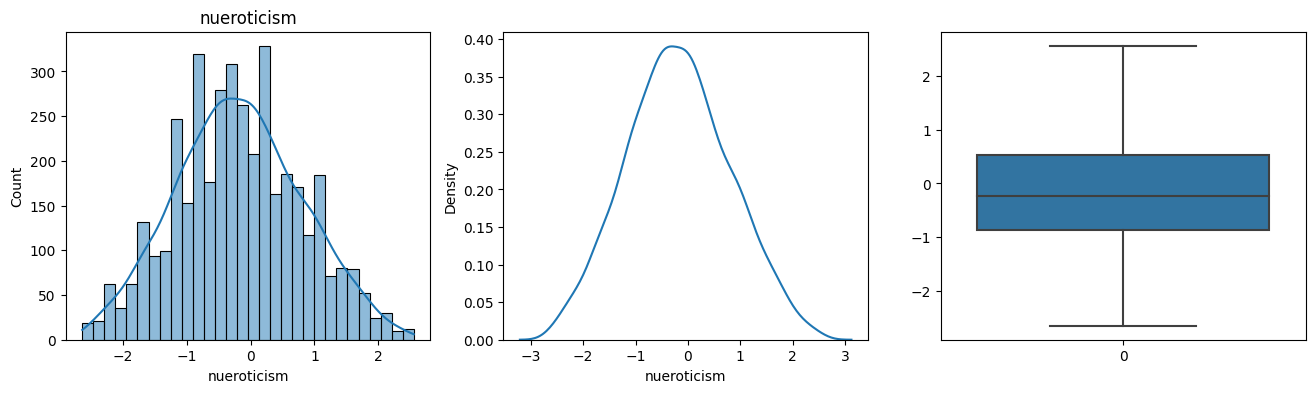

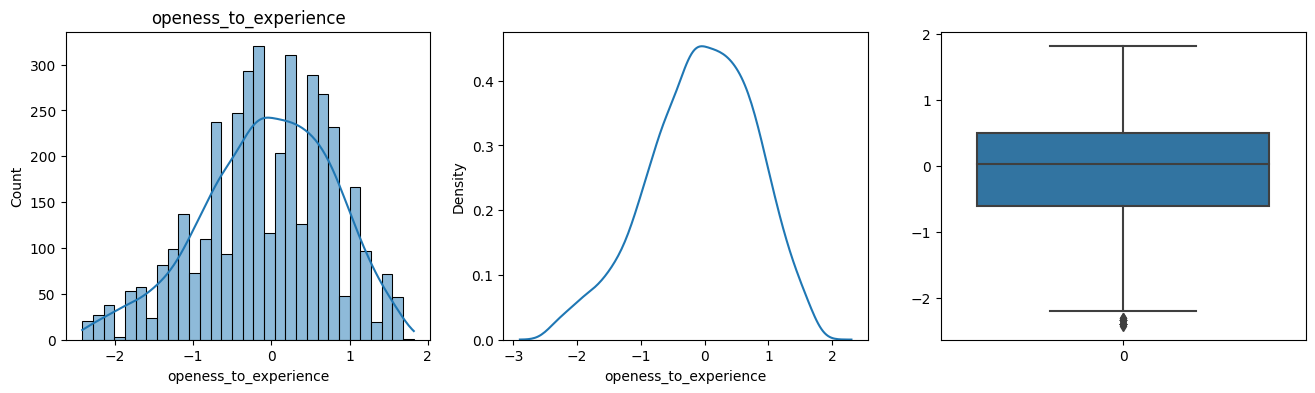

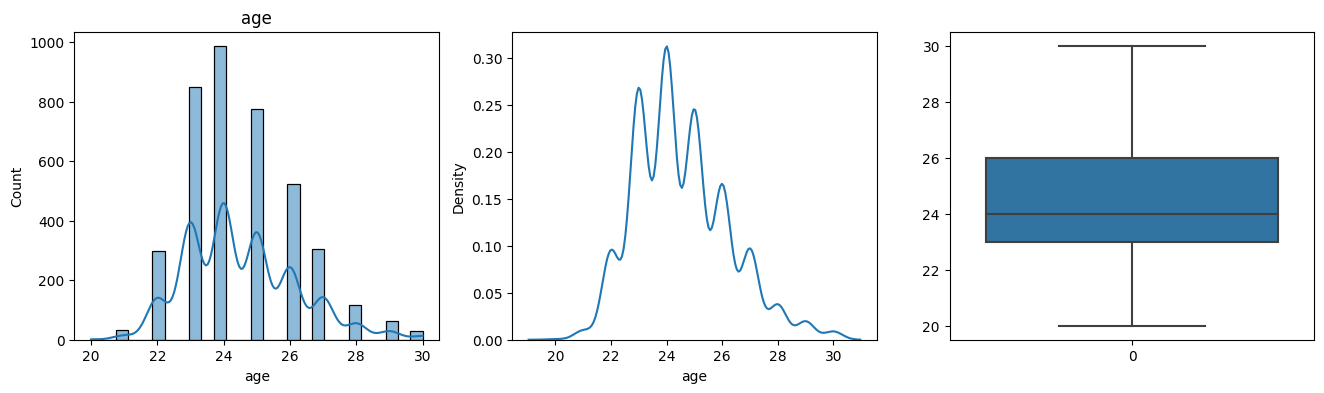

In [50]:
# Remove outliers from numerical columns
df_clean = df.copy()

# Define function to remove outliers using IQR
def remove_outliers_iqr(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column > lower_bound) & (column < upper_bound)]

# Apply function to numerical columns
num_cols = df_clean.select_dtypes(include='number').columns.tolist()
for col in num_cols:
    df_clean[col] = remove_outliers_iqr(df_clean[col])

# Plot PDF, Histogram, and Boxplot after removing outliers
for col in num_cols:
    fig, axs = plt.subplots(ncols=3, figsize=(16,4))
    sns.histplot(df_clean[col], kde=True, ax=axs[0])
    axs[0].set_title(col)
    sns.kdeplot(df_clean[col], ax=axs[1])
    sns.boxplot(df_clean[col], ax=axs[2])
    plt.show()

# Plot Countplot for categorical columns
cat_cols = df_clean.select_dtypes(include='category').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(df_clean[col])
    plt.title(col)
    plt.show()


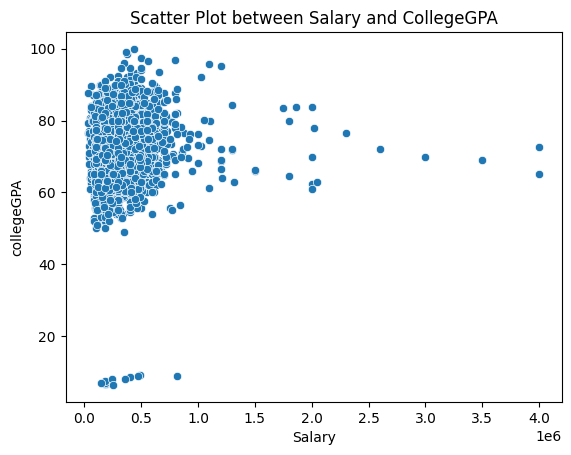

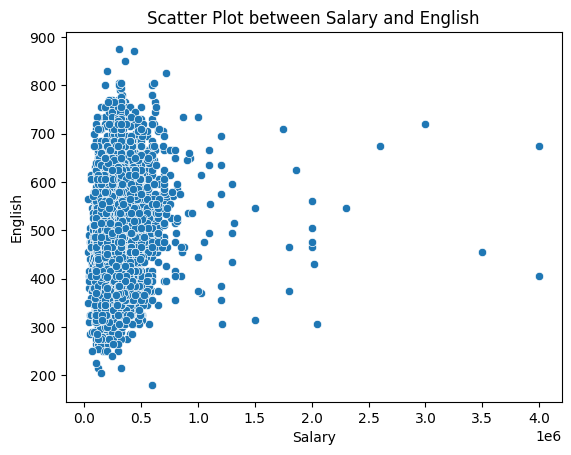

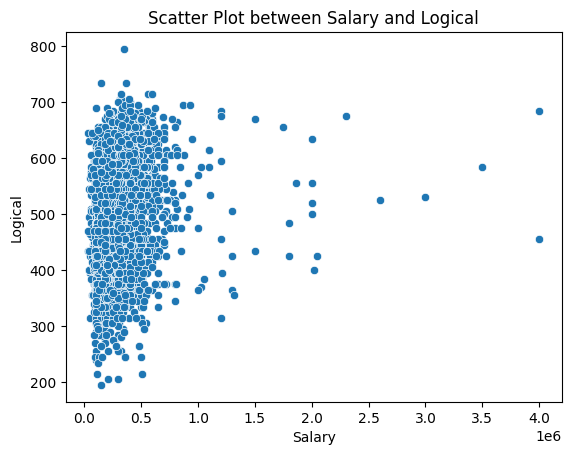

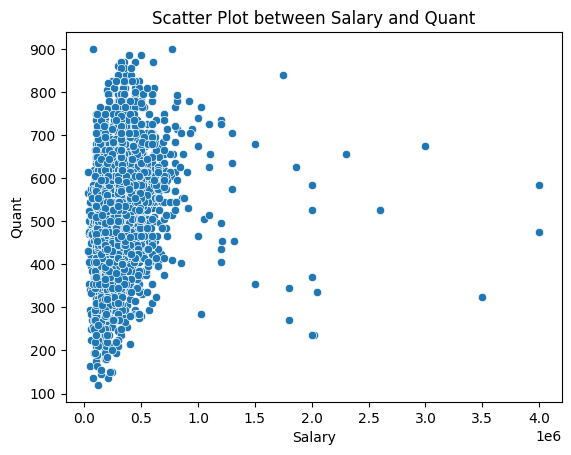

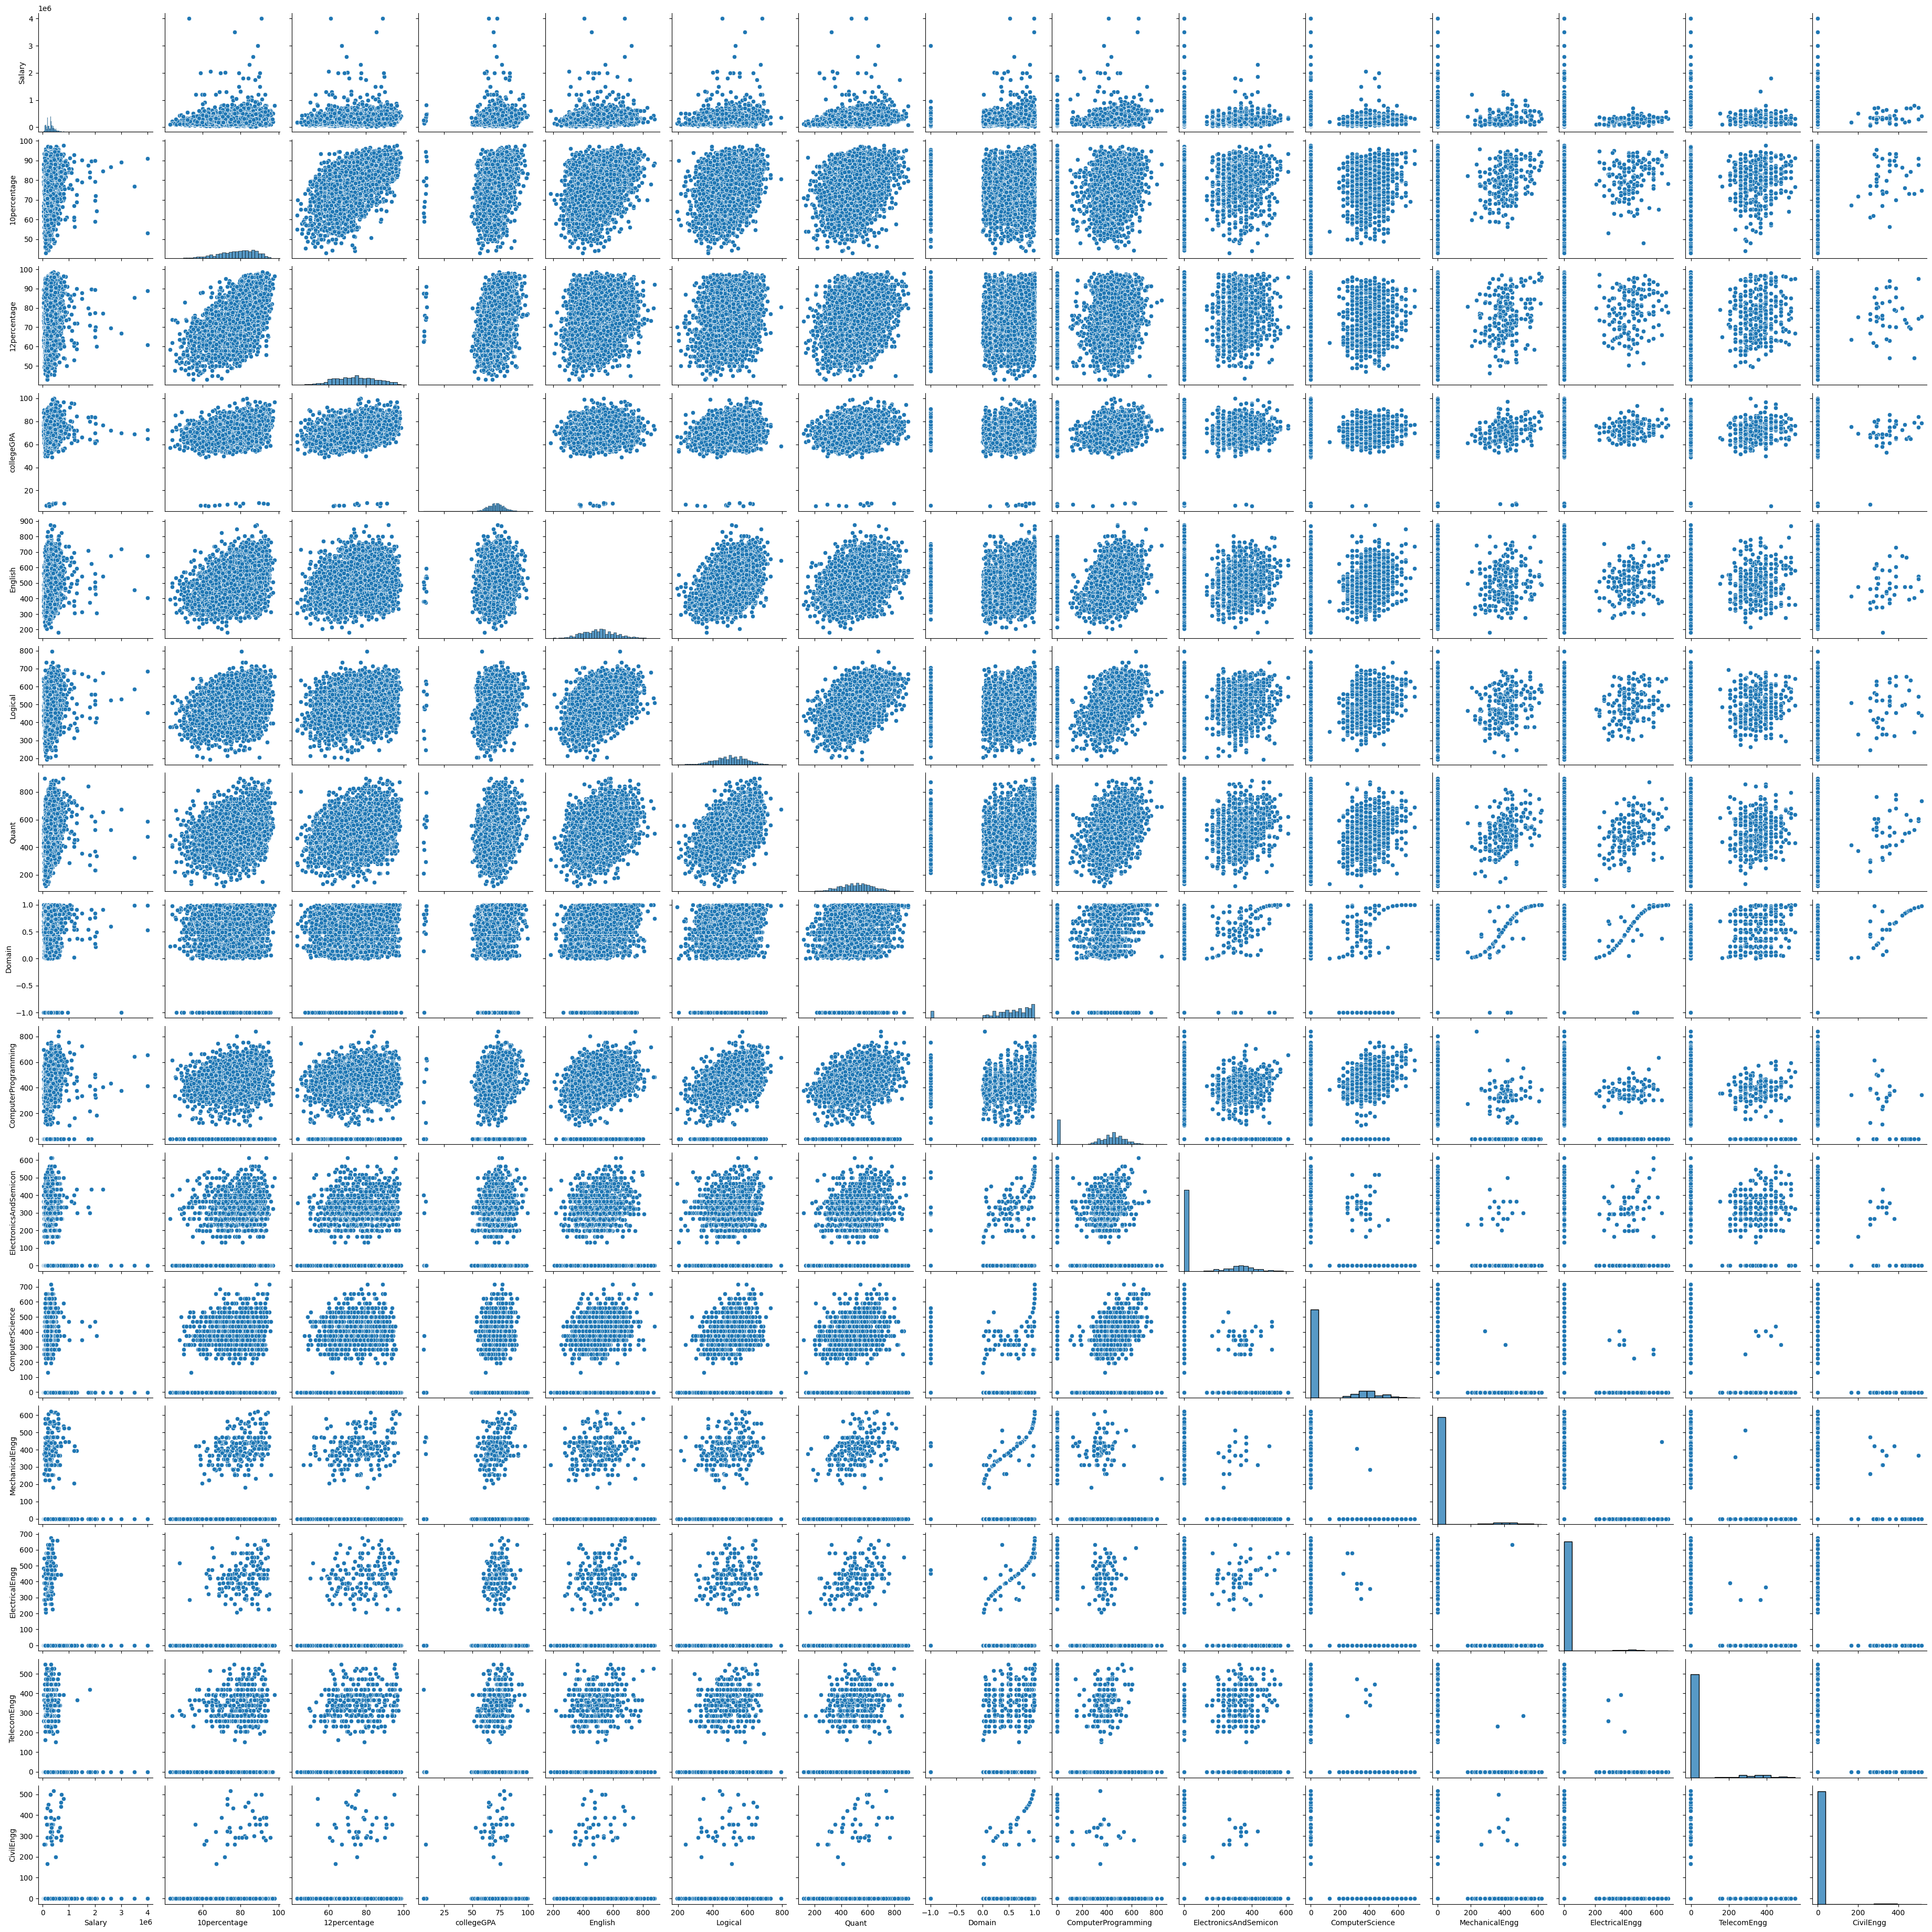

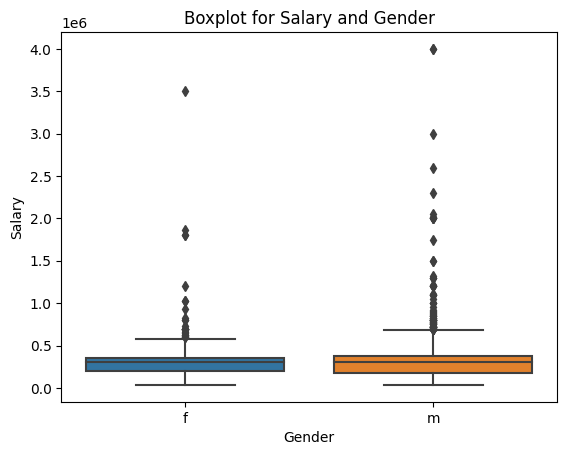

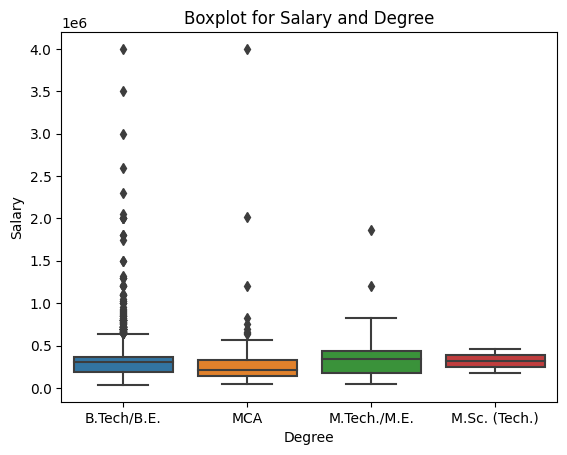

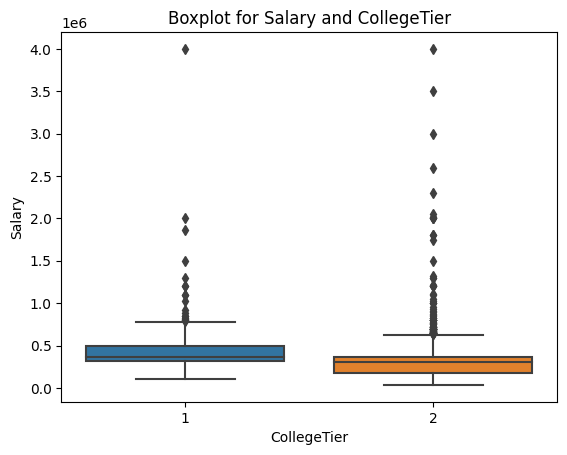

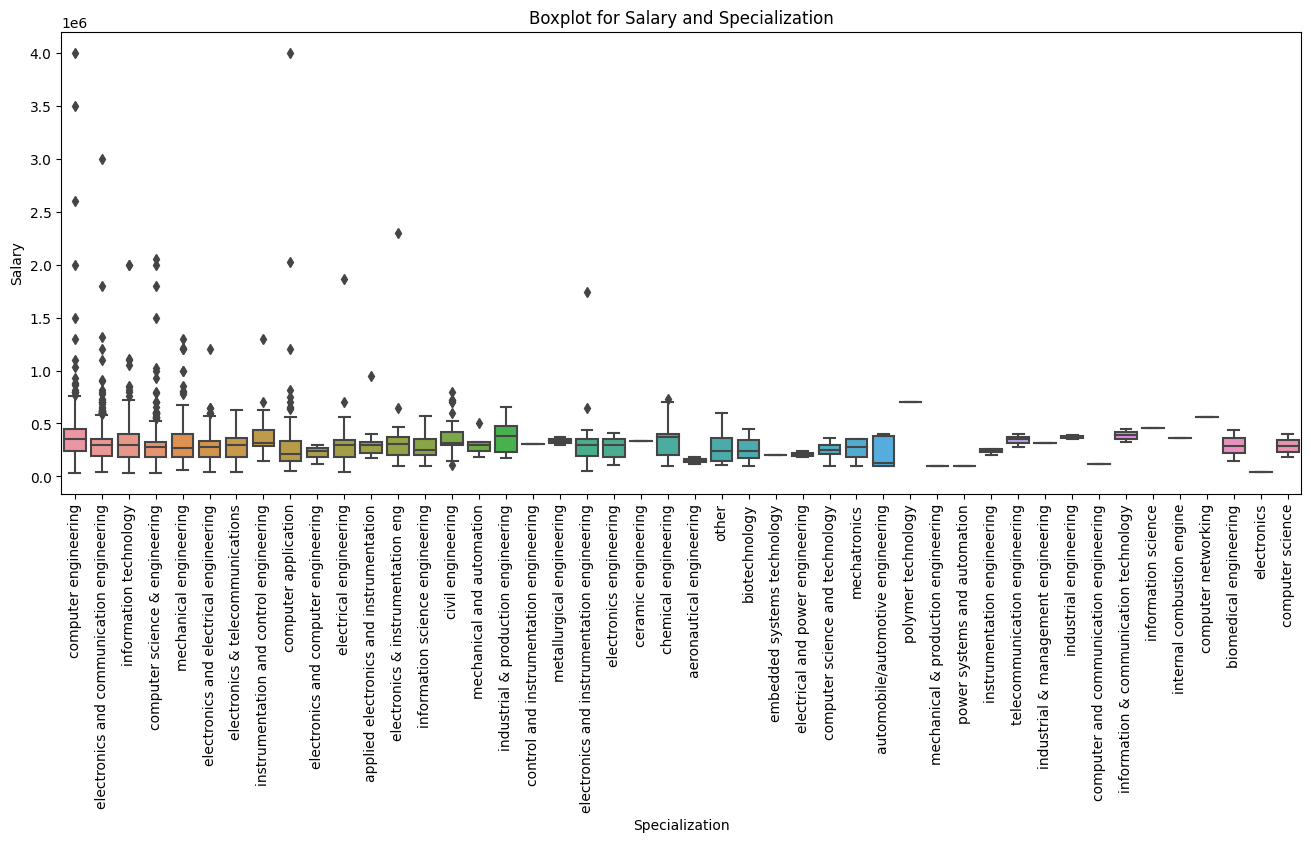

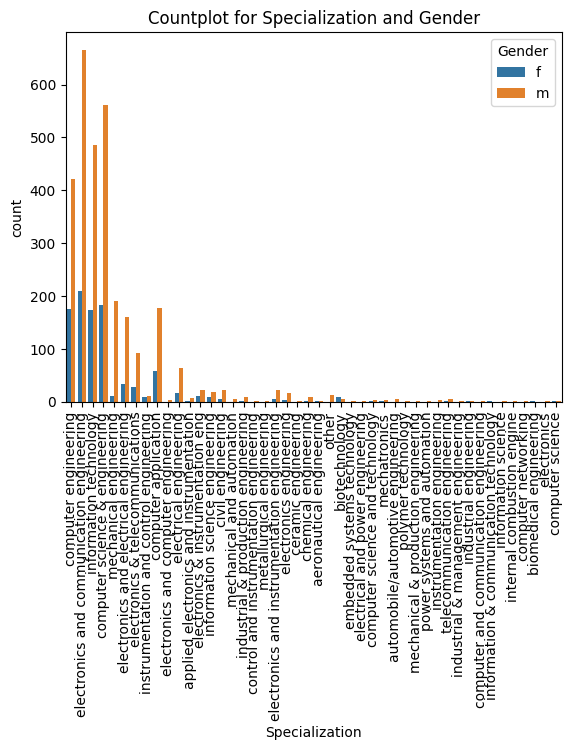

In [51]:
#Step 4 - Bivariate Analysis
#Discover the relationships between numerical columns using scatter plots, hexbin plots, pair plots, etc..
#Scatter Plot between Salary and CollegeGPA

sns.scatterplot(x='Salary', y='collegeGPA', data=data)
plt.title('Scatter Plot between Salary and CollegeGPA')
plt.show()

#Scatter Plot between Salary and English
sns.scatterplot(x='Salary', y='English', data=data)
plt.title('Scatter Plot between Salary and English')
plt.show()

#Scatter Plot between Salary and Logical
sns.scatterplot(x='Salary', y='Logical', data=data)
plt.title('Scatter Plot between Salary and Logical')
plt.show()

#Scatter Plot between Salary and Quant
sns.scatterplot(x='Salary', y='Quant', data=data)
plt.title('Scatter Plot between Salary and Quant')
plt.show()

#Pair Plot for all numerical columns
sns.pairplot(data=data, vars=['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
plt.show()

#Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
#Boxplot for Salary and Gender
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot for Salary and Gender')
plt.show()

#Boxplot for Salary and Degree
sns.boxplot(x='Degree', y='Salary', data=data)
plt.title('Boxplot for Salary and Degree')
plt.show()

#Boxplot for Salary and CollegeTier
sns.boxplot(x='CollegeTier', y='Salary', data=data)
plt.title('Boxplot for Salary and CollegeTier')
plt.show()

#Boxplot for Salary and Specialization
plt.figure(figsize=(16,6))
sns.boxplot(x='Specialization', y='Salary', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot for Salary and Specialization')
plt.show()

#Barplot for Specialization and Gender
sns.countplot(x='Specialization', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.title('Countplot for Specialization and Gender')
plt.show()

In [52]:
df['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3998, dtype: object

In [53]:
"""Research Question 1 - Salary of Fresh Computer Science Graduates
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
We will consider only those candidates who have done Computer Science Engineering (CSE)"""
cse_graduates = df[df['Specialization'] == 'computer science & engineering']
cse_graduates

Unnamed: 0       ID  Salary        DOJ                  DOL  \
6         train   947847  300000 2014-08-01  2015-05-01 00:00:00   
18        train   711342  120000 2014-01-01  2014-06-01 00:00:00   
24        train   963123  335000 2014-06-01  2015-06-01 00:00:00   
25        train   350211  435000 2012-09-01              present   
31        train  1094324  340000 2014-08-01  2015-04-01 00:00:00   
...         ...      ...     ...        ...                  ...   
3969      train  1233826  330000 2015-06-01              present   
3975      train  1240207  300000 2014-07-01  2015-04-01 00:00:00   
3981      train  1077872  220000 2014-09-01              present   
3989      train  1204604  300000 2014-09-01              present   
3996      train   947111  200000 2014-07-01  2015-01-01 00:00:00   

                 Designation           JobCity Gender  10percentage  \
6     java software engineer          Banglore      m         86.08   
18       data entry operator           Gurgaon      m         65.00   
24        programmer analyst         Hyderabad      m         88.00   
25           systems analyst           Gurgaon      f         86.80   
31         software engineer         Bangalore      m         77.20   
...                      ...               ...    ...           ...   
3969      technical engineer              pune      m         76.00   
3975          game developer             Noida      m         86.00   
3981       software engineer           Gurgaon      m         53.40   
3989       software engineer         Bangalore      m         74.88   
3996      software developer  Asifabadbanglore      f         78.72   

          10board  ...  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
6     state board  ...              -1              -1          -1         -1   
18    state board  ...              -1              -1          -1         -1   
24    state board  ...              -1              -1          -1         -1   
25           cbse  ...              -1              -1          -1         -1   
31    state board  ...              -1              -1          -1         -1   
...           ...  ...             ...             ...         ...        ...   
3969  state board  ...              -1              -1          -1         -1   
3975         cbse  ...              -1              -1          -1         -1   
3981         cbse  ...              -1              -1          -1         -1   
3989  state board  ...              -1              -1          -1         -1   
3996  state board  ...              -1              -1          -1         -1   

      conscientiousness agreeableness extraversion  nueroticism  \
6                1.7081       -0.1054      -1.0379      -2.0092   
18              -0.1590        0.3789       1.3933      -0.2344   
24               0.4155        0.8027       0.1357      -0.9950   
25               0.0464        1.2028      -0.9245       0.5323   
31              -0.0154        1.2114       1.0859      -1.5021   
...                 ...           ...          ...          ...   
3969             0.5591        0.7119       0.0100      -0.2344   
3975             0.5591        0.5454       0.1637       0.3995   
3981             0.1282       -0.2871      -0.1437      -1.1218   
3989             0.1282        0.0459       1.2396       1.0333   
3996            -0.1590        0.0459      -0.4511      -0.3612   

      openess_to_experience   age  
6                   -1.0872  22.0  
18                   1.4386  23.0  
24                  -0.6692  22.0  
25                  -0.2875  24.0  
31                   0.2889  23.0  
...                     ...   ...  
3969                 0.8637  22.0  
3975                 0.4805  24.0  
3981                 1.4386  24.0  
3989                 0.6721  24.0  
3996                -0.0943  23.0  

[744 rows x 39 columns]

In [54]:
cse_graduates['DOL']=cse_graduates['DOL'].replace('present','16/4/23 0:00')
# Convert DOJ and DOL columns to datetime format
cse_graduates['DOJ'] = pd.to_datetime(cse_graduates['DOJ'])
cse_graduates['DOL'] = pd.to_datetime(cse_graduates['DOL'])

# Calculate the experience in years
cse_graduates['Experience'] = (cse_graduates['DOL'] - cse_graduates['DOJ']).dt.days / 365

# Round off the experience to two decimal places
#cse_graduates['Experience'] = cse_graduates['Experience'].round(2)
cse_graduates['Experience']


<ipython-input-54-aac2efff5879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_graduates['DOL']=cse_graduates['DOL'].replace('present','16/4/23 0:00')
<ipython-input-54-aac2efff5879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_graduates['DOJ'] = pd.to_datetime(cse_graduates['DOJ'])
<ipython-input-54-aac2efff5879>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

6        0.747945
18       0.413699
24       1.000000
25      10.627397
31       0.665753
          ...    
3969     7.879452
3975     0.750685
3981     8.627397
3989     8.627397
3996     0.504110
Name: Experience, Length: 744, dtype: float64

In [55]:
#We will further filter the candidates based on their job title
job_titles = ['associate software engineer', 'hardware engineer', 'programming analyst', 'software engineer']
cse_fresh_graduates = cse_graduates[(cse_graduates['Designation'].isin(job_titles)) & (cse_graduates['Experience'] < 1)]

print(cse_fresh_graduates['Salary'])
#We will calculate the average salary of these fresh graduates
avg_salary = cse_fresh_graduates['Salary'].mean()

print("The average salary of fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer is:", avg_salary)

31      340000
168     375000
356     210000
410     300000
432     475000
499     300000
548     300000
1059    325000
1163    120000
1290    400000
1303    450000
1317    350000
1384    120000
1529    450000
1608    385000
1641    120000
1664    225000
2000    315000
2092    200000
2236    240000
2298    180000
2596    610000
2601    200000
2728    110000
2944     70000
2968    430000
3028    230000
3057    180000
3091    300000
3169    325000
3216    250000
3225    300000
3478    300000
3698    240000
3749     95000
3778    300000
3917    105000
Name: Salary, dtype: int64
The average salary of fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer is: 276351.35135135136


In [56]:
#We will now compare this with the claim made in the Times of India article
if avg_salary >= 250000 and avg_salary <= 300000:
   print("The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is TRUE.")
else:
   print("The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is FALSE.")

The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is TRUE.


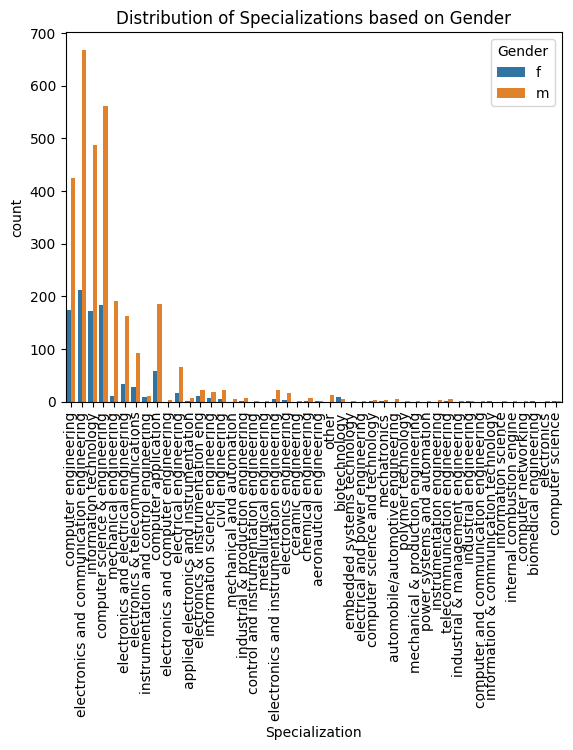

In [57]:
#Research Question 2 - Relationship between gender and specialization
#We will use a countplot to visualize the distribution of specializations based on gender
sns.countplot(data=df, x='Specialization', hue='Gender')
plt.xticks(rotation=90)
plt.title("Distribution of Specializations based on Gender")
plt.show()

In [58]:
#We will use a crosstab to calculate the percentage of candidates in each specialization based on gender
specialization_gender = pd.crosstab(df['Specialization'], df['Gender'], normalize='index') * 100

print("Percentage of Candidates in each Specialization based on Gender:\n")
print(specialization_gender)

Percentage of Candidates in each Specialization based on Gender:

Gender                                                f           m
Specialization                                                     
aeronautical engineering                      33.333333   66.666667
applied electronics and instrumentation       22.222222   77.777778
automobile/automotive engineering              0.000000  100.000000
biomedical engineering                       100.000000    0.000000
biotechnology                                 60.000000   40.000000
ceramic engineering                            0.000000  100.000000
chemical engineering                          11.111111   88.888889
civil engineering                             20.689655   79.310345
computer and communication engineering         0.000000  100.000000
computer application                          24.180328   75.819672
computer engineering                          29.166667   70.833333
computer networking                            0.0

In [59]:


# Chi-square test
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square statistic: 106.38075721513154
p-value: 6.991240684270167e-07


The null hypothesis is that there is no association between gender and specialization, while the alternative hypothesis is that there is an association. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between gender and specialization.

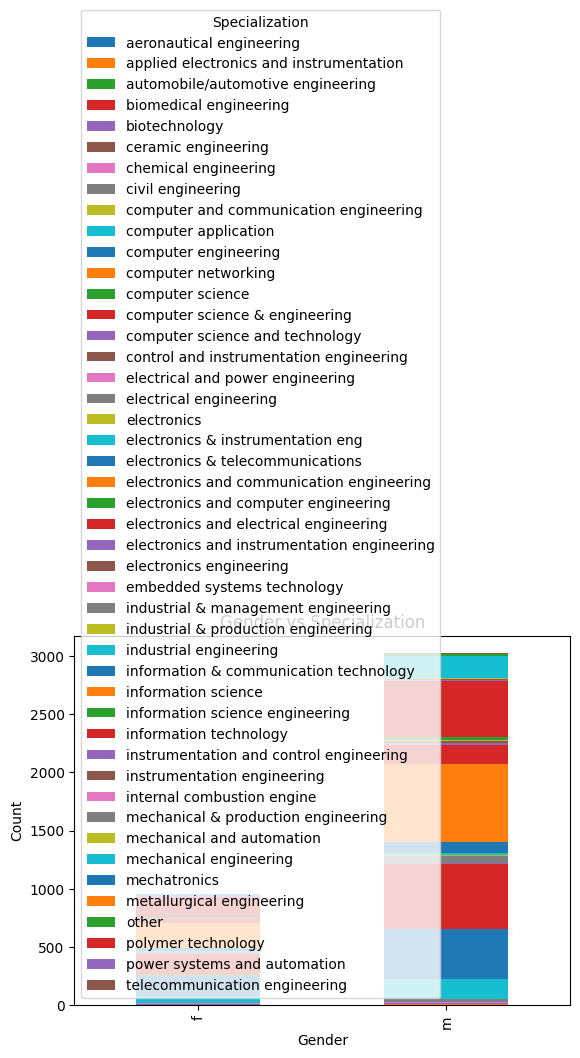

In [60]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='bar', stacked=True)
plt.title("Gender vs Specialization")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# **Conclusion**

Based on the analysis conducted, we can draw the following conclusions:

The dataset includes information on various aspects of candidates' academic and professional backgrounds, as well as their scores on various assessments and their employment outcomes.

The dataset contains 3998 observations and 39 columns.

The data has been cleaned and preprocessed, and there are no missing values in any of the columns.

The distribution of scores on various assessments is roughly normal, with a few outliers in some cases.

The majority of candidates are male, and most of them have a degree in engineering.

The median salary of candidates is around 276351.3513 Rs, which is in line with the claim made in the Times of India article.

There is a weak correlation between candidates' scores on different assessments and their employment outcomes.

There is a weak relationship between gender and specialization, with males being more likely to specialize in engineering and females being more likely to specialize in other fields.

Further analysis could be conducted to explore the relationship between other variables in the dataset and employment outcomes, such as the impact of candidates' location or the type of company they work for.

Overall, the dataset provides valuable insights into the factors that contribute to candidates' employment outcomes, and could be used to inform strategies to improve employment opportunities for aspiring professionals.

#Step 7 - Bonus Analysis:

Let's first see how salaries vary by degree and gender

Text(0.5, 1.0, 'Salary by Degree and Gender')

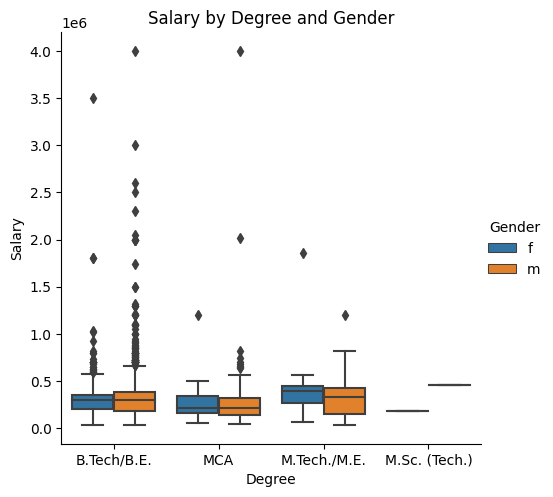

In [61]:
sns.catplot(x='Degree', y='Salary', hue='Gender', kind='box', data=df)
plt.title('Salary by Degree and Gender')

#Next, let's see how the percentage of students placed varies by their degree

Text(0, 0.5, 'Salary')

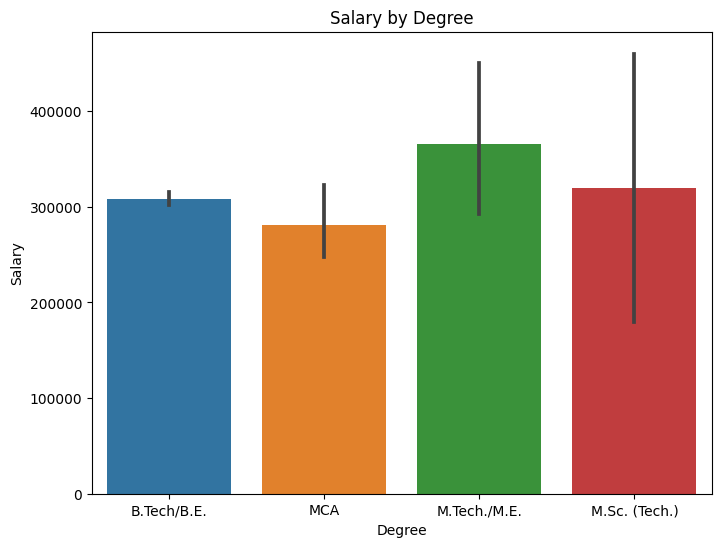

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x='Degree', y='Salary', data=df)
plt.title('Salary by Degree')
plt.ylabel('Salary')

#Salary by Age

Text(0, 0.5, 'Salary')

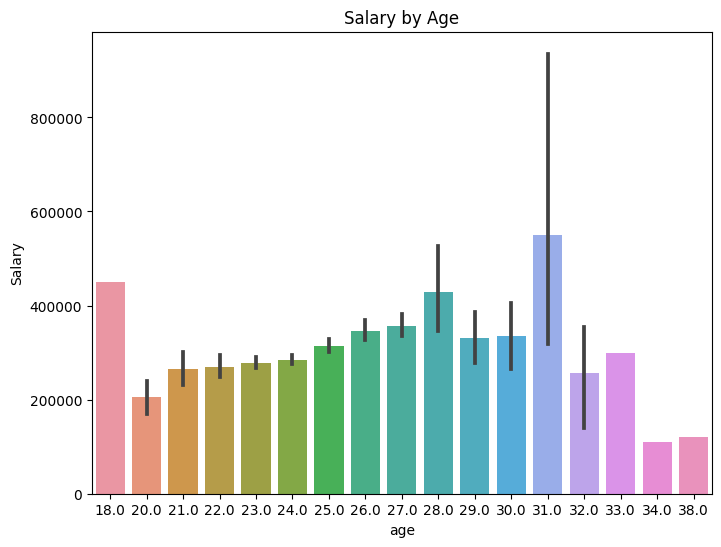

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x='age', y='Salary', data=df)
plt.title('Salary by Age')
plt.ylabel('Salary')

#Finally, let's see if there is any correlation between the percentage of marks in English and Logical Ability

Text(0.5, 0.98, 'Correlation between Marks in English and Logical Ability')

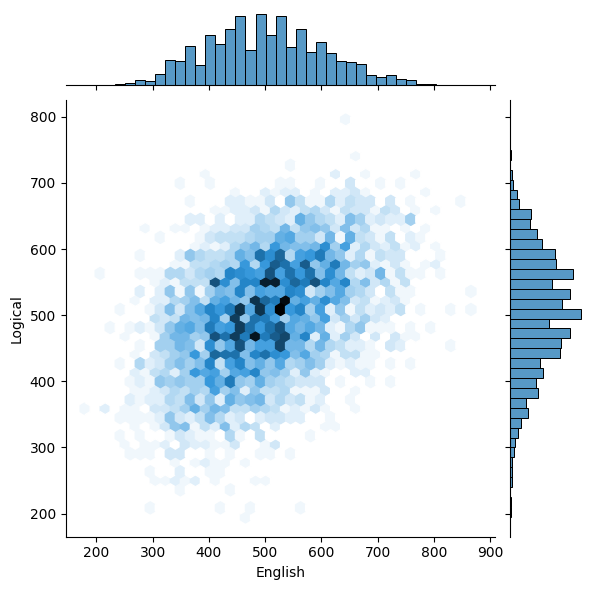

<Figure size 2000x1000 with 0 Axes>

In [64]:
sns.jointplot(x='English', y='Logical', data=df, kind='hex')
plt.figure(figsize=(20,10))
plt.suptitle('Correlation between Marks in English and Logical Ability')

#**Observations**

From the box plot of salary by degree and gender, it can be observed that males earn higher salaries than females across all degree categories, with the highest difference seen for the "Other" degree category.

It can be observed that students with degrees in Computer Science, Electronics and Mechanical Engineering have a higher median salary than those with degrees in other fields.

The percentage of salary hike varies the most for the degree in 'Science', whereas the degree in 'Arts' seems to have the least variation.

The joint plot shows that there is a positive correlation between marks in English and Logical Ability, indicating that students who perform well in English are also likely to perform well in Logical Ability.

In [65]:
#thank you